<font color='skyblue' size='5'> <b> Telecom Churn Case Study </b> </font>

<font size='4'> <b> Business problem </b></font>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [1]:
###########################################################################################################
##  Program Name        : Telecom Churn Case Study
##
##  Author(s)           : Chandan Kumar
##                        Prachi Sharma
###########################################################################################################

In [2]:
import numpy as np
print('numpy version\t:',np.__version__)

import pandas as pd
print('pandas version\t:',pd.__version__)

import seaborn as sns
print('seaborn version\t:',sns.__version__)

import os
import platform
print('Python version\t:',platform.python_version())

# Import Pandas profiling
import pandas_profiling as pp

# Ignore warning due to version mismatch
import warnings
warnings.filterwarnings('ignore') 

# To display all the columns
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import stats

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# Machine Learning related libraries
%matplotlib inline
import matplotlib.pyplot as plt # for plotting

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA #Improting the PCA module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF

numpy version	: 1.18.2
pandas version	: 0.25.3
seaborn version	: 0.9.1
Python version	: 3.5.6


# Stage 1 : Data understanding, preparation, and feature engineering

## Data Sourcing and Understanding 


In [3]:
# Source the dataset in a dataframe

rawdata = pd.read_csv('/home/chandan/upgrad/Assignments/machine_learning_2/telecom_churn_data.csv')

# Check the Shape of the dataframe
nRow, nCol = rawdata.shape
print("There are ",nRow ,"rows and ",nCol," columns")

# Lets read first 5 records to understand the dataset
rawdata.head()


There are  99999 rows and  226  columns


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [4]:
def explain_dataframe(dataframe):
    print("Info : \n")
    display(dataframe.info())
    print("\n Description : ")
    display(dataframe.describe())

explain_dataframe(rawdata)

Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


None


 Description : 


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count        99,999.00  99,999.00       98,981.00       98,981.00   
mean  7,001,207,270.39     109.00            0.00            0.00   
std         695,669.39       0.00            0.00            0.00   
min   7,000,000,074.00     109.00            0.00            0.00   
25%   7,000,606,232.50     109.00            0.00            0.00   
50%   7,001,204,632.00     109.00            0.00            0.00   
75%   7,001,812,030.50     109.00            0.00            0.00   
max   7,002,410,905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
count       98,981.00 99,999.00 99,999.00 99,999.00 99,999.00    96,062.00   
mean             0.00    282.99    278.54    279.15    261.65       132.40   
std              0.00    328.44    338.16    344.47    342.00       297.21   
min              0.00 -2,258.71 -2,014.05   -945.81 -1,899.51         0.00   
25%              0.00     93.41     86.98     84.13     62.69         7.38   
50%              0.00    197.70    191.64    192.08    176.85        34.31   
75%              0.00    371.06    365.34    369.37    353.47       118.74   
max              0.00 27,731.09 35,145.83 33,543.62 38,805.62     7,376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count    96,140.00    94,621.00    92,254.00     96,062.00     96,140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max       8,157.78    10,752.56    10,427.46      8,362.36      9,667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count     94,621.00     92,254.00      96,062.00      96,140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max       14,007.34     10,310.76      13,724.38      15,371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count      94,621.00      92,254.00      96,062.00      96,140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max        13,095.36       8,464.03       3,775.11       2,812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count      94,621.00      92,254.00         96,062.00         96,140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max         5,337.04       4,428.46          6,431.33          7,400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count         94

The last four columns started with month names - jun. jul, aug, sep. Since the nomenclature for all monthly columns are given with month numbers instead of names. So rename these columns according to their month number

## Find high Value customers first before data cleaning


In [5]:
# Rename few Columns
rawdata.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

# Read top 5 records again
rawdata.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

<font size='5'> Churn definition : To Calculate High value customers</font>


Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Our dataset is divided into 3 phases:
Good phase wherein the customer is happy with the service
Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevet churn
Churn phase wherein the customer would have churned

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

Lets first Identify high Value customers

<font size='4'><b>Find average recharge amount in the first two months</b></font>

First calculate the total data recharge amount for good phase(i.e. month 6 and 7) and action phase(month 8)
using the equation (total_rech_data * av_rech_amt_data)

Then calculate the average recharge amount in the first two months (the good phase). i.e month 6 and 7
using the equation (total_rech_amt_6 + total_data_rech_6 + total_rech_amt_7 + total_data_rech_7)/2

check if both columns for each month has null values at same index

In [6]:
# Get the index of null values for both columns and verify if both matches 

res6 = rawdata.total_rech_data_6[rawdata.total_rech_data_6.isna()].index != rawdata.av_rech_amt_data_6[rawdata.av_rech_amt_data_6.isna()].index
print('June :', res6.any())

res7 = rawdata.total_rech_data_7[rawdata.total_rech_data_7.isna()].index != rawdata.av_rech_amt_data_7[rawdata.av_rech_amt_data_7.isna()].index
print('July :', res7.any())

res8 = rawdata.total_rech_data_8[rawdata.total_rech_data_8.isna()].index != rawdata.av_rech_amt_data_8[rawdata.av_rech_amt_data_8.isna()].index
print('Aug :', res8.any())

June : False
July : False
Aug : False


From above output, now we know that if total_rech_data is null then av_rech_amt_data is also null

So Lets check the null count and impute null values with 0 for both features for each month

In [7]:
# finding the count of NULL values in these columns
print(rawdata.loc[:, [col for col in rawdata.columns if 'total_rech_data_' in col]].isnull().sum())
print(rawdata.loc[:, [col for col in rawdata.columns if 'av_rech_amt_data_' in col]].isnull().sum())

total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64


In [8]:
# Impute values with 0 as these columns are in use for high value customers filter
rawdata.total_rech_data_6.fillna(0, inplace=True)
rawdata.total_rech_data_7.fillna(0, inplace=True)
rawdata.total_rech_data_8.fillna(0, inplace=True)

rawdata.av_rech_amt_data_6.fillna(0, inplace=True)
rawdata.av_rech_amt_data_7.fillna(0, inplace=True)
rawdata.av_rech_amt_data_8.fillna(0, inplace=True)

In [9]:
# Check if there are NULL values in total_rech_amnt monthly columns
print(rawdata['total_rech_amt_6'].isna().sum())
print(rawdata['total_rech_amt_7'].isna().sum())
print(rawdata['total_rech_amt_8'].isna().sum())

0
0
0


In [10]:
# Check the information of total recharge amount columns
rawdata[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count         99,999.00         99,999.00         99,999.00
mean             327.51            322.96            324.16
std              398.02            408.11            416.54
min                0.00              0.00              0.00
25%              109.00            100.00             90.00
50%              230.00            220.00            225.00
75%              437.50            428.00            434.50
90%              732.00            731.00            736.00
95%              994.00            993.00            996.00
99%            1,683.02          1,728.00          1,721.00
100%          35,190.00         40,335.00         45,320.00
max           35,190.00         40,335.00         45,320.00

    - So, There are no null values in total_rech_amt columns of all three months

In [11]:
#Function to check categorical or continuous columns
def column_type_analysis(dataframe):
    numerical_df = dataframe.select_dtypes(include='number')
    categorical_df = dataframe.select_dtypes(exclude='number')
    print('Total Numerical columns : {}'.format(numerical_df.shape[1]))
    print('Total Categorical columns : {}'.format(categorical_df.shape[1]))
    return numerical_df, categorical_df

In [12]:
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(rawdata)

Total Numerical columns : 214
Total Categorical columns : 12


<b> Lets Derive some new features </b>

In [13]:
# Total data recharge amount
rawdata['total_data_rech_amt_6'] = rawdata['total_rech_data_6'] * rawdata['av_rech_amt_data_6']
rawdata['total_data_rech_amt_7'] = rawdata['total_rech_data_7'] * rawdata['av_rech_amt_data_7']
rawdata['total_data_rech_amt_8'] = rawdata['total_rech_data_8'] * rawdata['av_rech_amt_data_8']

# Total amount from data recharge and ic/og calls
rawdata['call_data_amt_6'] = rawdata[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
rawdata['call_data_amt_7'] = rawdata[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
rawdata['call_data_amt_8'] = rawdata[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

# Average of amount for first 2 months
rawdata['good_phase_amt_avg'] = rawdata[['call_data_amt_6','call_data_amt_6']].mean(axis=1)

As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.

But if we use greater than or equal to, we end up getting a little above 30K records as against to 29.9K records.

So, better use greater than symbol to get 29.9K high value customers to meet problem checkpoint.


In [14]:
rawdata[['good_phase_amt_avg', 'total_rech_amt_6', 'total_rech_amt_7', 'total_data_rech_amt_6', 'total_data_rech_amt_7']].head()

good_phase_amt_avg  total_rech_amt_6  total_rech_amt_7  \
0              614.00               362               252   
1               74.00                74               384   
2              168.00               168               315   
3              230.00               230               310   
4              252.00               196               350   

   total_data_rech_amt_6  total_data_rech_amt_7  
0                 252.00                 252.00  
1                   0.00                 154.00  
2                   0.00                   0.00  
3                   0.00                   0.00  
4                  56.00                   0.00

In [15]:
# Print the customers count with recharge amount more than 70th percentile
print("Number of high value filtered customers are : ",(rawdata['good_phase_amt_avg'] >= rawdata['good_phase_amt_avg'].quantile(0.7)).value_counts())
print("\n")
# Filter the records of high value customers whose recharge amount should be more than 70th percentile.

df_hvc = rawdata[(rawdata['good_phase_amt_avg'] >= rawdata['good_phase_amt_avg'].quantile(0.7))]

print("70th percentile of the average recharge amount in the first two months  =", rawdata.good_phase_amt_avg.quantile(0.7))

#Look at Information
print("Dataframe Info: \n")
df_hvc.info()

Number of high value filtered customers are :  False    69843
True     30156
Name: good_phase_amt_avg, dtype: int64


70th percentile of the average recharge amount in the first two months  = 476.0
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30156 entries, 0 to 99998
Columns: 233 entries, mobile_number to good_phase_amt_avg
dtypes: float64(186), int64(35), object(12)
memory usage: 53.8+ MB


In [16]:
print("Number of rows before filtering the high value customers =", len(rawdata))
df_hvc = pd.DataFrame(rawdata.loc[rawdata['good_phase_amt_avg'] >= rawdata.good_phase_amt_avg.quantile(0.7)])
print("Number of rows after filtering the high value customers =", len(df_hvc))

Number of rows before filtering the high value customers = 99999
Number of rows after filtering the high value customers = 30156


<font size='5'> <b> Churn customers </b> </font>

<b>Tag churners and remove attributes of the churn phase</b>

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [17]:
df_hvc['churn'] = np.where(
                            ((df_hvc['total_ic_mou_9'] == 0.00) | (df_hvc['total_og_mou_9'] == 0.00))
                            & ((df_hvc['vol_2g_mb_9'] == 0.00) | (df_hvc['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

print(df_hvc['churn'].value_counts())
print(df_hvc['churn'].value_counts()/df_hvc.shape[0])

0    26050
1     4106
Name: churn, dtype: int64
0   0.86
1   0.14
Name: churn, dtype: float64


In [18]:
df_hvc[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(10)

churn  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0       1            0.00            0.00         0.00         0.00
6       0        2,572.49           65.91         0.00         0.00
7       1            0.00            0.00         0.00         0.00
13      0          631.86          446.09         0.00         0.00
16      0          334.56          255.74         0.00         0.00
17      0           87.13          631.08         0.00         0.00
21      0          252.61        1,031.53         0.00         0.00
33      0          114.16            1.70        30.92     5,588.11
41      0          165.84           89.13         0.00         0.00
47      0          165.56           43.96        53.59       698.04

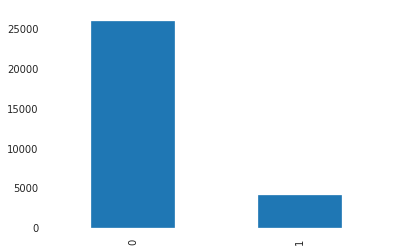

In [19]:
# Check the unique values count in churn column
df_hvc.churn.value_counts()
df_hvc['churn'].value_counts().plot(kind='bar')

## Data Cleaning : Fix columns and rows

In [20]:
# Function to drop one or more columns

def dropColumns(df, column_list):
    for column in column_list:
        print('Dropping', column, '...')
        try:
            df.drop(column, axis=1, inplace=True)
        except:
            print('\tColumn already dropped...')
            continue

In [21]:
dropColumns(df_hvc, ["good_phase_amt_avg"])

Dropping good_phase_amt_avg ...


<b> After defining the y variable by tagging churners, lets delete the columns having _9 string in their names </b>

After tagging churners, remove all the attributes corresponding to the churn phase
(all attributes having ‘ _9’, etc. in their names).

Get the list of columns which has name ends with _9 attribute

In [22]:
# find the columns which has name ends with _9 attribute
month_9_columns = df_hvc.columns[df_hvc.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_columns

The columns names ends with _9 are given below...


Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

<b> Drop the columns of churn phase month i.e., 9th Month </b>

In [23]:
dropColumns(df_hvc, month_9_columns)
df_hvc.head()

Dropping last_date_of_month_9 ...
Dropping arpu_9 ...
Dropping onnet_mou_9 ...
Dropping offnet_mou_9 ...
Dropping roam_ic_mou_9 ...
Dropping roam_og_mou_9 ...
Dropping loc_og_t2t_mou_9 ...
Dropping loc_og_t2m_mou_9 ...
Dropping loc_og_t2f_mou_9 ...
Dropping loc_og_t2c_mou_9 ...
Dropping loc_og_mou_9 ...
Dropping std_og_t2t_mou_9 ...
Dropping std_og_t2m_mou_9 ...
Dropping std_og_t2f_mou_9 ...
Dropping std_og_t2c_mou_9 ...
Dropping std_og_mou_9 ...
Dropping isd_og_mou_9 ...
Dropping spl_og_mou_9 ...
Dropping og_others_9 ...
Dropping total_og_mou_9 ...
Dropping loc_ic_t2t_mou_9 ...
Dropping loc_ic_t2m_mou_9 ...
Dropping loc_ic_t2f_mou_9 ...
Dropping loc_ic_mou_9 ...
Dropping std_ic_t2t_mou_9 ...
Dropping std_ic_t2m_mou_9 ...
Dropping std_ic_t2f_mou_9 ...
Dropping std_ic_t2o_mou_9 ...
Dropping std_ic_mou_9 ...
Dropping total_ic_mou_9 ...
Dropping spl_ic_mou_9 ...
Dropping isd_ic_mou_9 ...
Dropping ic_others_9 ...
Dropping total_rech_num_9 ...
Dropping total_rech_amt_9 ...
Dropping max_rech

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109            0.00            0.00            0.00   
6      7001051193        109            0.00            0.00            0.00   
7      7000701601        109            0.00            0.00            0.00   
13     7002191713        109            0.00            0.00            0.00   
16     7000875565        109            0.00            0.00            0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.38   
6             6/30/2014            7/31/2014            8/31/2014   429.02   
7             6/30/2014            7/31/2014            8/31/2014 1,069.18   
13            6/30/2014            7/31/2014            8/31/2014   492.85   
16            6/30/2014            7/31/2014            8/31/2014   430.98   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.82   213.80          nan          nan         0.00           nan   
6    190.70   255.11        71.03        45.03        76.66        262.73   
7  1,349.85 3,171.48        57.84        54.68        52.29        453.43   
13   205.67   593.26       501.76       108.39       534.24        413.31   
16   299.87   187.89        50.51        74.01        70.61        296.29   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            nan          0.00            nan            nan           0.00   
6          49.24         92.08           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             nan            nan           0.00               nan   
6            0.00           0.00           0.00             71.03   
7           23.74          12.59          38.06             51.39   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                nan              0.00               nan               nan   
6              45.03             76.14            252.23             48.71   
7              31.38             40.28            308.63            447.38   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               nan               nan              0.00   
6              80.63             10.38              0.00              0.00   
7             162.28             62.13             55.14             53.23   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                nan               nan              0.00           nan   
6               0.11              0.00              0.00        333.64   
7               0.00              0.00              0.00        422.16   
13              0.00              0.00              0.49        205.31   
16              0.00              0.00              0.00        315.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            nan          0.00               nan               nan   
6          93.74        156.78              0.00              0.00   
7         533.91        255.79              4.30             23.29   
13         53.48        353.99        

In [24]:
# Check the Shape of the high value customer dataframe
nRow, nCol = df_hvc.shape
print("There are ",nRow ,"rows and ",nCol," columns")

There are  30156 rows and  178  columns


<b> Find the columns which has unique values </b>

In [25]:
# Calculate missing percentage
def calculate_percentage(value, base, round_digits = 2):
    return round((value/base)*100, round_digits)

In [26]:
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df_hvc.isnull().sum()/len(df_hvc))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
121  date_of_last_rech_data_8     51.78
145                 arpu_3g_8     51.78
166                 fb_user_8     51.78
148                 arpu_2g_8     51.78
127           max_rech_data_8     51.78
133           count_rech_3g_8     51.78
151          night_pck_user_8     51.78
130           count_rech_2g_8     51.78
132           count_rech_3g_7     51.64
129           count_rech_2g_7     51.64
126           max_rech_data_7     51.64
120  date_of_last_rech_data_7     51.64
150          night_pck_user_7     51.64
165                 fb_user_7     51.64
147                 arpu_2g_7     51.64
144                 arpu_3g_7     51.64
164                 fb_user_6     43.77
143                 arpu_3g_6     43.77
119  date_of_last_rech_data_6     43.77
125           max_rech_data_6     43.77
131           count_rech_3g_6     43.77
149          night_pck_user_6     43.77
146                 arpu_2g_6     43.77
128           count_rech_2g_6     43.77
76               loc_ic_mou_8      6.00
49           std_og_t2c_mou_8      6.00
52               std_og_mou_8      6.00
55               isd_og_mou_8      6.00
58               spl_og_mou_8      6.00
61                og_others_8      6.00
67           loc_ic_t2t_mou_8      6.00
73           loc_ic_t2f_mou_8      6.00
85           std_ic_t2f_mou_8      6.00
79           std_ic_t2t_mou_8      6.00
82           std_ic_t2m_mou_8      6.00
88           std_ic_t2o_mou_8      6.00
91               std_ic_mou_8      6.00
97               spl_ic_mou_8      6.00
100              isd_ic_mou_8      6.00
103               ic_others_8      6.00
43           std_og_t2m_mou_8      6.00
46           std_og_t2f_mou_8      6.00
70           loc_ic_t2m_mou_8      6.00
28           loc_og_t2m_mou_8      6.00
31           loc_og_t2f_mou_8      6.00
19              roam_ic_mou_8      6.00
34           loc_og_t2c_mou_8      6.00
37               loc_og_mou_8      6.00
16               offnet_mou_8      6.00
22              roam_og_mou_8      6.00
25           loc_og_t2t_mou_8      6.00
13                onnet_mou_8      6.00
40           std_og_t2t_mou_8      6.00
84           std_ic_t2f_mou_7      3.08
81           std_ic_t2m_mou_7      3.08
99               isd_ic_mou_7      3.08
30           loc_og_t2f_mou_7      3.08
78           std_ic_t2t_mou_7      3.08
87           std_ic_t2o_mou_7      3.08
33           loc_og_t2c_mou_7      3.08
75               loc_ic_mou_7      3.08
102               ic_others_7      3.08
96               spl_ic_mou_7      3.08
90               std_ic_mou_7      3.08
72           loc_ic_t2f_mou_7      3.08
24           loc_og_t2t_mou_7      3.08
69           loc_ic_t2m_mou_7      3.08
42           std_og_t2m_mou_7      3.08
27           loc_og_t2m_mou_7      3.08
57               spl_og_mou_7      3.08
45           std_og_t2f_mou_7      3.08
12                onnet_mou_7      3.08
48           std_og_t2c_mou_7      3.08
51               std_og_mou_7      3.08
39           std_og_t2t_mou_7      3.08
66           loc_ic_t2t_mou_7      3.08
15               offnet_mou_7      3.08
54               isd_og_mou_7      3.08
60                og_others_7      3.08
36               loc_og_mou_7      3.08
18              roam_ic_mou_7      3.08
21              roam_og_mou_7      3.08
115       date_of_last_rech_8      3.06
101               ic_others_6      1.54
17              roam_ic_mou_6      1.54
14               offnet_mou_6      1.54
98               isd_ic_mou_6      1.54
20              roam_og_mou_6      1.54
26           loc_og_t2m_mou_6      1.54
11                onnet_mou_6      1.54
95               spl_ic_mou_6      1.54
23           loc_og_t2t_mou_6      1.54
89               std_ic_mou_6      1.54
56               spl_og_mou_6      1.54
71           loc_ic_t2f_mou_6      1.54
35               loc_og_mou_6      1.54
41           std_og_t2m_mou_6      1.54
50               std_og_mou_6      1.54
65           loc_ic_t2t_mou_6      1.54
53               isd_o

In [27]:
# Delete all such columns having unique values less than 2

count = 0
cols = []
for col in df_hvc.columns:
    if df_hvc[col].nunique() < 2:
        count+=1
        print(count, " ColName = ", col,
              ",\t UniqueValues = ", df_hvc[col].unique(),
              ",\t Dtype = ", df_hvc[col].dtype)
        cols.append(col)

1  ColName =  circle_id ,	 UniqueValues =  [109] ,	 Dtype =  int64
2  ColName =  loc_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
3  ColName =  std_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
4  ColName =  loc_ic_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
5  ColName =  last_date_of_month_6 ,	 UniqueValues =  ['6/30/2014'] ,	 Dtype =  object
6  ColName =  last_date_of_month_7 ,	 UniqueValues =  ['7/31/2014' nan] ,	 Dtype =  object
7  ColName =  last_date_of_month_8 ,	 UniqueValues =  ['8/31/2014' nan] ,	 Dtype =  object
8  ColName =  std_og_t2c_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
9  ColName =  std_og_t2c_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
10  ColName =  std_og_t2c_mou_8 ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
11  ColName =  std_ic_t2o_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
12  ColName =  std_ic_t2o_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
13  ColName =  std_ic_t2o_m

In [28]:
# Drop these above columns
dropColumns(df_hvc, cols)

# Check the dataframe shape
nRow, nCol = df_hvc.shape
print("In df_hvc, there are ",nRow ,"rows and ",nCol," columns now")

Dropping circle_id ...
Dropping loc_og_t2o_mou ...
Dropping std_og_t2o_mou ...
Dropping loc_ic_t2o_mou ...
Dropping last_date_of_month_6 ...
Dropping last_date_of_month_7 ...
Dropping last_date_of_month_8 ...
Dropping std_og_t2c_mou_6 ...
Dropping std_og_t2c_mou_7 ...
Dropping std_og_t2c_mou_8 ...
Dropping std_ic_t2o_mou_6 ...
Dropping std_ic_t2o_mou_7 ...
Dropping std_ic_t2o_mou_8 ...
In df_hvc, there are  30156 rows and  165  columns now


In [29]:
# Analyse column types
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(df_hvc)

Total Numerical columns : 159
Total Categorical columns : 6


<font size='4'><b> Treat rows with null values more than 70% </b></font>

Delete the rows which has more than 70% null values

In [30]:
null_percentage = 0.70
na_perc_rows = round(df_hvc.isnull().sum(axis=1) / len(df_hvc.columns),2 )
print("\nBefore dropping : Number of rows which has more than 70% NULL values = ", na_perc_rows[na_perc_rows > null_percentage].count())

thres = np.int(len(df_hvc.columns)*round(1-null_percentage, 1))
print("Before dropping : Threshold value = ", thres)

print("Before dropping : Total Number of rows = ", len(df_hvc))
df_hvc.dropna(thresh=thres,inplace=True)

na_perc_rows = round(df_hvc.isnull().sum(axis=1) / len(df_hvc.columns),2 )
print("\nAfter dropping : Number of rows which has more than 70% NULL values = ", na_perc_rows[na_perc_rows > null_percentage].count())
print("After dropping : Total Number of rows = ", len(df_hvc))


Before dropping : Number of rows which has more than 70% NULL values =  0
Before dropping : Threshold value =  49
Before dropping : Total Number of rows =  30156

After dropping : Number of rows which has more than 70% NULL values =  0
After dropping : Total Number of rows =  30156


In [31]:
# df_hvc.loc[:, df_hvc.dtypes != object]
df_hvc.head(10)

mobile_number  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753  197.38  214.82  213.80          nan          nan   
6      7001051193  429.02  190.70  255.11        71.03        45.03   
7      7000701601 1069.18 1349.85 3171.48        57.84        54.68   
13     7002191713  492.85  205.67  593.26       501.76       108.39   
16     7000875565  430.98  299.87  187.89        50.51        74.01   
17     7000187447  690.01   18.98   25.50      1185.91         9.28   
21     7002124215  514.45  597.75  637.76       102.41       132.11   
33     7000149764  977.02 2362.83  409.23         0.00         0.00   
41     7000721289  482.83  425.76  229.77        86.39       118.88   
47     7001482006   31.18   72.51   32.66         1.91        11.21   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           nan           nan          0.00            nan   
6         76.66        262.73         49.24         92.08           0.00   
7         52.29        453.43        567.16        325.91          16.23   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   
33         0.00          0.00          0.00          0.00           0.00   
41        80.44        232.36        280.78        136.69           0.00   
47         3.09         23.96         45.11         27.84           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             nan           0.00            nan            nan           0.00   
6            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00           0.00   
47           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                nan               nan              0.00               nan   
6              71.03             45.03             76.14            252.23   
7              51.39             31.38             40.28            308.63   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   
33              0.00              0.00              0.00              0.00   
41             86.39            118.88             80.44            142.69   
47              1.91             11.21              3.09             23.19   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                nan              0.00               nan               nan   
6              48.71             80.63             10.38              0.00   
7             447.38            162.28             62.13             55.14   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   
33        

    - Lets handle NaN values in columns which doesn't have unique values

<b> Get the percentage for null values in each columns </b>

In [32]:
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())
na_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 107


fb_user_8                  51.78
count_rech_3g_8            51.78
night_pck_user_8           51.78
date_of_last_rech_data_8   51.78
arpu_2g_8                  51.78
max_rech_data_8            51.78
arpu_3g_8                  51.78
count_rech_2g_8            51.78
fb_user_7                  51.64
max_rech_data_7            51.64
count_rech_2g_7            51.64
count_rech_3g_7            51.64
date_of_last_rech_data_7   51.64
arpu_3g_7                  51.64
arpu_2g_7                  51.64
night_pck_user_7           51.64
arpu_3g_6                  43.77
max_rech_data_6            43.77
count_rech_3g_6            43.77
fb_user_6                  43.77
date_of_last_rech_data_6   43.77
night_pck_user_6           43.77
count_rech_2g_6            43.77
arpu_2g_6                  43.77
loc_ic_t2f_mou_8            6.00
std_og_t2t_mou_8            6.00
loc_ic_t2t_mou_8            6.00
og_others_8                 6.00
spl_og_mou_8                6.00
isd_og_mou_8                6.00
std_og_mou

<font size='3'> <b> Treat columns with null values </b> </font>

Analyse and impute missing values for MOU columns

MOU = Minutes of usage - voice calls if the entry is empty then it means calls are not made so we can impute 0 for missing values here.

1. ONNET = All kind of calls within the same operator network
2. OFFNET = All kind of calls outside the operator T network
3. IC = Incoming calls
4. ROAM = Indicates that customer is in roaming zone during the call
5. OG = Outgoing calls
6. LOC = Local calls - within same telecom circle
7. STD = STD calls - outside the calling circle
8. T2T = Operator T to T, i.e. within same operator (mobile to mobile)
9. T2M = Operator T to other operator mobile
10. T2F = Operator T to fixed lines of T
11. T2C = Operator T to it’s own call center
12. T2O = Operator T to other operator fixed line

In [33]:
mou_columns = df_hvc.columns[df_hvc.columns.str.contains(pat = '_mou')]
print("MOU columns\n", mou_columns.values)

MOU columns
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6'
 'loc_ic_t2f_mou_7' 'loc_i

In [34]:
print(na_percent[mou_columns].unique())
df_hvc[mou_columns].head(2)

[1.54 3.08 6.    nan]


onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0          nan          nan         0.00           nan           nan   
6        71.03        45.03        76.66        262.73         49.24   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00            nan            nan           0.00            nan   
6         92.08           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            nan           0.00               nan               nan   
6           0.00           0.00             71.03             45.03   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00               nan               nan              0.00   
6             76.14            252.23             48.71             80.63   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0               nan               nan              0.00               nan   
6             10.38              0.00              0.00              0.11   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               nan              0.00           nan           nan   
6              0.00              0.00        333.64         93.74   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          0.00               nan               nan              0.00   
6        156.78              0.00              0.00              0.51   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0               nan               nan              0.00               nan   
6              0.00              0.53             11.45              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               nan              0.00           nan           nan   
6              0.00              0.00          0.00          0.53   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           nan           nan          0.00           nan   
6         11.96          0.00          0.00          0.00          0.11   

   spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0           nan          0.00            0.00            0.00            0.00   
6          0.53          0.00          333.76           94.81          168.74   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               nan               nan              0.16               nan   
6           1857.99           1427.04           1896.43            248.64   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0               nan              4.13               nan               nan   
6            336.96            265.28             20.24             22.69   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0              1.15           nan           nan          5.44   
6              2.51       2126.89       1786.71       2164.23   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0               nan               nan              0.00               nan   
6              0.00              0.00              0.00              1.39   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0               nan              0.00               nan               nan   
6              0.76              2.60              0.00              0.00   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0              0.00           nan           nan          0.00            0.00   
6              0.00          1.39          0.76          2.60         2128.41   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            0.00            5.44           nan           nan          0.00   
6     

    - All above fields have very small amount of missing values(less than 6%).
    
    - Here 0 indicates not used so we can impute null values with 0.
    
    - Imputing missing values with 0 for all the MOU columns

In [35]:
df_hvc[mou_columns] = df_hvc[mou_columns].fillna(0)
print("Null Value counts:", df_hvc[mou_columns].isnull().sum().unique())
df_hvc[mou_columns].head(2)

Null Value counts: [0]


onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
6        71.03        45.03        76.66        262.73         49.24   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00           0.00           0.00           0.00           0.00   
6         92.08           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00           0.00              0.00              0.00   
6           0.00           0.00             71.03             45.03   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
6             76.14            252.23             48.71             80.63   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
6             10.38              0.00              0.00              0.11   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          0.00          0.00   
6              0.00              0.00        333.64         93.74   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          0.00              0.00              0.00              0.00   
6        156.78              0.00              0.00              0.51   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
6              0.00              0.53             11.45              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0              0.00              0.00          0.00          0.00   
6              0.00              0.00          0.00          0.53   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00          0.00          0.00          0.00          0.00   
6         11.96          0.00          0.00          0.00          0.11   

   spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.00          0.00            0.00            0.00            0.00   
6          0.53          0.00          333.76           94.81          168.74   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0              0.00              0.00              0.16              0.00   
6           1857.99           1427.04           1896.43            248.64   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0              0.00              4.13              0.00              0.00   
6            336.96            265.28             20.24             22.69   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0              1.15          0.00          0.00          5.44   
6              2.51       2126.89       1786.71       2164.23   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
6              0.00              0.00              0.00              1.39   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
6              0.76              2.60              0.00              0.00   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0              0.00          0.00          0.00          0.00            0.00   
6              0.00          1.39          0.76          2.60         2128.41   

   total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0            0.00            5.44          0.00          0.00          0.00   
6     

    - Analyse and impute missing values for OTHERS columns

In [36]:
others_cols = df_hvc.columns[df_hvc.columns.str.contains(pat = '_others_')]
df_hvc[others_cols].head()

og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0           nan          nan         0.00          nan          nan   
6          0.00         0.00         0.00         0.11         0.58   
7          0.00         0.00         0.00        15.74        15.19   
13         0.00         0.00         0.00        83.48        16.24   
16         0.00         0.00         0.00         0.00         0.00   

    ic_others_8  
0          0.00  
6          0.28  
7         15.14  
13        21.44  
16         0.00

In [37]:
print(na_percent[others_cols].unique())
df_hvc[others_cols].head(2)

[1.54 3.08 6.  ]


og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0          nan          nan         0.00          nan          nan   
6         0.00         0.00         0.00         0.11         0.58   

   ic_others_8  
0         0.00  
6         0.28

    - All above fields have very small amount of missing values(less than 6%).
    
    - Here 0 indicates not used so we can impute null values with 0.
    
    - Imputing Missing values with 0 for all the Others columns.

In [38]:
df_hvc[others_cols] = df_hvc[others_cols].fillna(0)
print("Null Value counts:", df_hvc[others_cols].isnull().sum().unique())
df_hvc[others_cols].head(2)

Null Value counts: [0]


og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
0         0.00         0.00         0.00         0.00         0.00   
6         0.00         0.00         0.00         0.11         0.58   

   ic_others_8  
0         0.00  
6         0.28

    - Imputing date of last recharge columns

In [39]:
tel_categorical_columns_df.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [40]:
# Impute NaN values with end of month date by default
df_hvc.date_of_last_rech_6.fillna('6/30/2014', inplace=True)
df_hvc.date_of_last_rech_7.fillna('7/31/2014', inplace=True)
df_hvc.date_of_last_rech_8.fillna('8/31/2014', inplace=True)

df_hvc.date_of_last_rech_data_6.fillna('6/30/2014', inplace=True)
df_hvc.date_of_last_rech_data_7.fillna('7/31/2014', inplace=True)
df_hvc.date_of_last_rech_data_8.fillna('8/31/2014', inplace=True)

In [41]:
df_hvc['date_of_last_rech_6'] = pd.to_datetime(df_hvc['date_of_last_rech_6'])
df_hvc['date_of_last_rech_7'] = pd.to_datetime(df_hvc['date_of_last_rech_7'])
df_hvc['date_of_last_rech_8'] = pd.to_datetime(df_hvc['date_of_last_rech_8'])

df_hvc['date_of_last_rech_data_6'] = pd.to_datetime(df_hvc['date_of_last_rech_data_6'])
df_hvc['date_of_last_rech_data_7'] = pd.to_datetime(df_hvc['date_of_last_rech_data_7'])
df_hvc['date_of_last_rech_data_8'] = pd.to_datetime(df_hvc['date_of_last_rech_data_8'])

In [42]:
df_hvc['day_of_last_rech_6'] = df_hvc['date_of_last_rech_6'].dt.day
df_hvc['day_of_last_rech_7'] = df_hvc['date_of_last_rech_7'].dt.day
df_hvc['day_of_last_rech_8'] = df_hvc['date_of_last_rech_8'].dt.day

df_hvc['day_of_last_rech_data_6'] = df_hvc['date_of_last_rech_data_6'].dt.day
df_hvc['day_of_last_rech_data_7'] = df_hvc['date_of_last_rech_data_7'].dt.day
df_hvc['day_of_last_rech_data_8'] = df_hvc['date_of_last_rech_data_8'].dt.day

In [43]:
user_columns=df_hvc.columns[df_hvc.columns.str.contains(pat = '_user_')]
user_columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')

In [44]:
print(df_hvc.night_pck_user_6.unique())
print(df_hvc.night_pck_user_7.unique())
print(df_hvc.night_pck_user_8.unique())

print(df_hvc.fb_user_6.unique())
print(df_hvc.fb_user_7.unique())
print(df_hvc.fb_user_8.unique())

df_hvc[user_columns].head(2)

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]


night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0              0.00              0.00              0.00       1.00       1.00   
6               nan               nan               nan        nan        nan   

   fb_user_8  
0       1.00  
6        nan

As these columns have only three distinct values and one among them is Nan, lets impute this category columns

<b> Treating Categorical Variables </b>

In [45]:
# Night Pack columns
df_hvc['night_pck_user_6'] = df_hvc.loc[:,'night_pck_user_6'].fillna(-1).astype(int)
df_hvc['night_pck_user_7'] = df_hvc.loc[:,'night_pck_user_7'].fillna(-1).astype(int)
df_hvc['night_pck_user_8'] = df_hvc.loc[:,'night_pck_user_8'].fillna(-1).astype(int)

# Fb User Columns
df_hvc['fb_user_6'] = df_hvc.loc[:,'fb_user_6'].fillna(-1).astype(int)
df_hvc['fb_user_7'] = df_hvc.loc[:,'fb_user_7'].fillna(-1).astype(int)
df_hvc['fb_user_8'] = df_hvc.loc[:,'fb_user_8'].fillna(-1).astype(int)


<b> Let's Re-calculate the null percentages </b>

In [46]:
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())
print("And the column names are,")
na_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 15
And the column names are,


arpu_2g_8         51.78
arpu_3g_8         51.78
count_rech_3g_8   51.78
count_rech_2g_8   51.78
max_rech_data_8   51.78
arpu_2g_7         51.64
arpu_3g_7         51.64
count_rech_3g_7   51.64
count_rech_2g_7   51.64
max_rech_data_7   51.64
arpu_2g_6         43.77
arpu_3g_6         43.77
count_rech_3g_6   43.77
count_rech_2g_6   43.77
max_rech_data_6   43.77
dtype: float64

    - From the above three months tables records, it is clearly visible that all the data columns is null or 0 if the user has not subscribed data.

    - Therefore, for the rows where date_of_last_rech_data is "nan" we can impute '0'

    - Imputing null values in columns for data with 0

In [47]:
# List out columns to impute
cols_to_impute = na_percent.index
print(cols_to_impute)

# Impute the column nll values
df_hvc[cols_to_impute] = df_hvc[cols_to_impute].fillna(0)
print("After Imputing the Null Value counts = ", df_hvc[cols_to_impute].isnull().sum().unique())
df_hvc[cols_to_impute].head(2)

Index(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')
After Imputing the Null Value counts =  [0]


max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
0           252.00           252.00           252.00             0.00   
6             0.00             0.00             0.00             0.00   

   count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
0             0.00             0.00             1.00             1.00   
6             0.00             0.00             0.00             0.00   

   count_rech_3g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  \
0             1.00     212.17     212.17     212.17     212.17     212.17   
6             0.00       0.00       0.00       0.00       0.00       0.00   

   arpu_2g_8  
0     212.17  
6       0.00

<b> Re-Calculate the Null percentage again </b>

In [48]:
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())

Number of columns which has atleast one null value is 0


<font size=4>Columns not relevent for analysis</font>
    - Analysing numerical columns

In [49]:
# Analyse column types
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(df_hvc)

Total Numerical columns : 165
Total Categorical columns : 6


    - As we converted date of last recharge columns to day of last recharge for analysis, so lets drop base columns


In [50]:
dropColumns(df_hvc, tel_categorical_columns_df.columns)

Dropping date_of_last_rech_6 ...
Dropping date_of_last_rech_7 ...
Dropping date_of_last_rech_8 ...
Dropping date_of_last_rech_data_6 ...
Dropping date_of_last_rech_data_7 ...
Dropping date_of_last_rech_data_8 ...


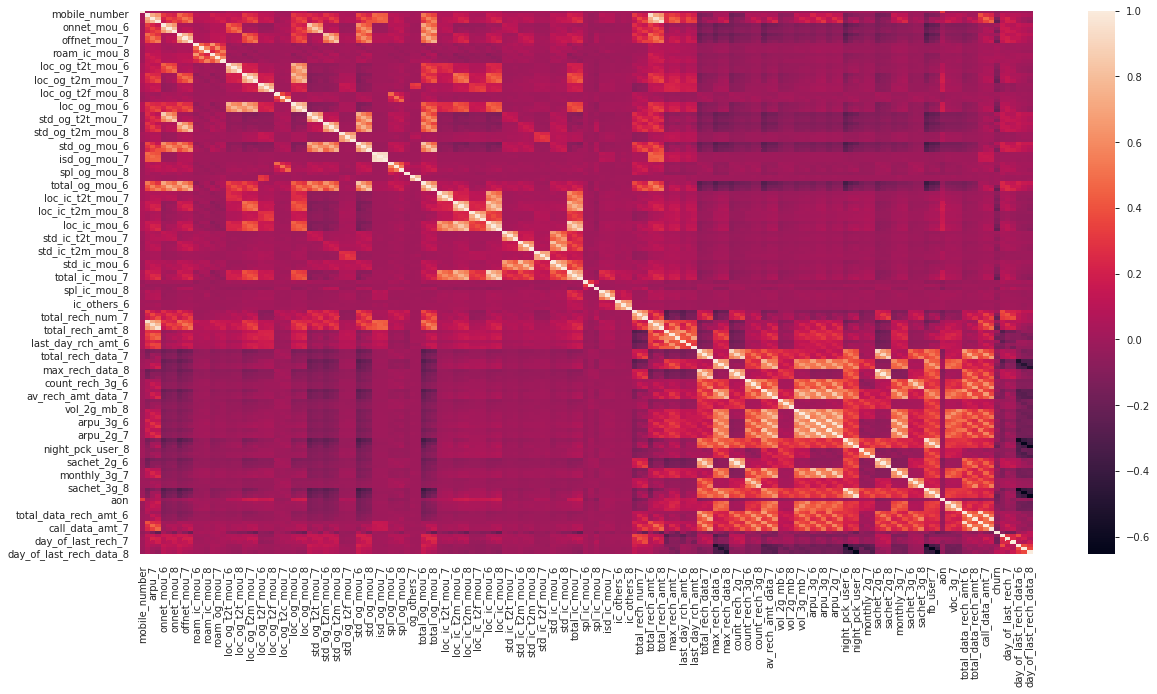

In [51]:
# Find correlation between numeric columns
plt.figure(figsize=(20,10))
sns.heatmap(tel_numerical_columns_df.corr())
plt.show()

<font size=4>Finding correlated columns</font>

In [52]:
# Create correlation matrix
corr_matrix = df_hvc.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
corr_columns = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Corelated columns : \n {}'.format(corr_columns))

Corelated columns : 
 ['isd_og_mou_7', 'isd_og_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'call_data_amt_6', 'call_data_amt_7', 'call_data_amt_8']


<font size=4>Dropping Correlated columns</font>

In [53]:
df_hvc.drop(corr_columns, axis = 1, inplace = True)

In [54]:
# Analyse column types
tel_numerical_columns_df, tel_categorical_columns_df = column_type_analysis(df_hvc)

Total Numerical columns : 145
Total Categorical columns : 0


<font size=4>Create Master dataframe</font>

In [55]:
# Lets make a master dataframe after data cleaning step for data visualization
master_df=df_hvc

In [56]:
# Lets have a look at dataset
master_df.head(10)

mobile_number  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753  197.38  214.82  213.80         0.00         0.00   
6      7001051193  429.02  190.70  255.11        71.03        45.03   
7      7000701601 1069.18 1349.85 3171.48        57.84        54.68   
13     7002191713  492.85  205.67  593.26       501.76       108.39   
16     7000875565  430.98  299.87  187.89        50.51        74.01   
17     7000187447  690.01   18.98   25.50      1185.91         9.28   
21     7002124215  514.45  597.75  637.76       102.41       132.11   
33     7000149764  977.02 2362.83  409.23         0.00         0.00   
41     7000721289  482.83  425.76  229.77        86.39       118.88   
47     7001482006   31.18   72.51   32.66         1.91        11.21   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
6         76.66        262.73         49.24         92.08           0.00   
7         52.29        453.43        567.16        325.91          16.23   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   
33         0.00          0.00          0.00          0.00           0.00   
41        80.44        232.36        280.78        136.69           0.00   
47         3.09         23.96         45.11         27.84           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
6            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00           0.00   
47           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
6              71.03             45.03             76.14            252.23   
7              51.39             31.38             40.28            308.63   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   
33              0.00              0.00              0.00              0.00   
41             86.39            118.88             80.44            142.69   
47              1.91             11.21              3.09             23.19   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
6              48.71             80.63             10.38              0.00   
7             447.38            162.28             62.13             55.14   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   
33        

<font size='4'> <b>Derive few features based on change in the behaviour of customer between "good phase" and "action phase"</font>

- Both based on usage and recharge

<font size='3'> <b> Recharge amount difference for Data </b> </font>

In [57]:
# Recharge amount difference for both data and calls
master_df['total_data_rech_difference'] = master_df['total_data_rech_amt_8'] - ( ( master_df['total_data_rech_amt_6'] + master_df['total_data_rech_amt_7'] ) / 2 )

<font size='3'> <b> Volume based cost usage difference </b> </font>

In [58]:
# Volume based Cost usage difference
master_df['vbc_3g_difference'] = master_df['vbc_3g_8'] - ( ( master_df['vbc_3g_6'] + master_df['vbc_3g_7'] ) / 2 )

<font size='3'> <b> Volume usage difference </b> </font>

In [59]:
# Volume usage difference
master_df['vol_2g_mb_difference'] = master_df['vol_2g_mb_8'] - ( ( master_df['vol_2g_mb_6'] + master_df['vol_2g_mb_7'] ) / 2 )
master_df['vol_3g_mb_difference'] = master_df['vol_3g_mb_8'] - ( ( master_df['vol_3g_mb_6'] + master_df['vol_3g_mb_7'] ) / 2 )

<font size='3'> <b> Incoming calls usage difference </b> </font>

In [60]:
# Incoming calls usage difference
master_df['roam_ic_mou_difference'] = master_df['roam_ic_mou_8'] - ( ( master_df['roam_ic_mou_6'] + master_df['roam_ic_mou_7'] ) / 2 )
master_df['loc_ic_mou_difference'] = master_df['loc_ic_mou_8'] - ( ( master_df['loc_ic_mou_6'] + master_df['loc_ic_mou_7'] ) / 2 )
master_df['std_ic_mou_difference'] = master_df['std_ic_mou_8'] - ( ( master_df['std_ic_mou_6'] + master_df['std_ic_mou_7'] ) / 2 )
master_df['isd_ic_mou_difference'] = master_df['isd_ic_mou_8'] - ( ( master_df['isd_ic_mou_6'] + master_df['isd_ic_mou_7'] ) / 2 )
master_df['spl_ic_mou_difference'] = master_df['spl_ic_mou_8'] - ( ( master_df['spl_ic_mou_6'] + master_df['spl_ic_mou_7'] ) / 2 )
master_df['total_ic_mou_difference'] = master_df['total_ic_mou_8'] - ( ( master_df['total_ic_mou_6'] + master_df['total_ic_mou_7'] ) / 2 )

<font size='3'> <b> Outgoing calls usage difference </b> </font>

In [61]:
# Outgoing calls usage difference
master_df['roam_og_mou_difference'] = master_df['roam_og_mou_8'] - ( ( master_df['roam_og_mou_6'] + master_df['roam_og_mou_7'] ) / 2 )
master_df['loc_og_mou_difference'] = master_df['loc_og_mou_8'] - ( ( master_df['loc_og_mou_6'] + master_df['loc_og_mou_7'] ) / 2 )
master_df['std_og_mou_difference'] = master_df['std_og_mou_8'] - ( ( master_df['std_og_mou_6'] + master_df['std_og_mou_7'] ) / 2 )
master_df['spl_og_mou_difference'] = master_df['spl_og_mou_8'] - ( ( master_df['spl_og_mou_6'] + master_df['spl_og_mou_7'] ) / 2 )
master_df['total_og_mou_difference'] = master_df['total_og_mou_8'] - ( ( master_df['total_og_mou_6'] + master_df['total_og_mou_7'] ) / 2 )


<font size='3'> <b> arpu, onnet and offnet differences </b> </font>

In [62]:
master_df['arpu_difference']=master_df['arpu_8'] - ((master_df['arpu_6'] + master_df['arpu_7']) / 2 ) 
master_df['onnet_mou_difference']=master_df['onnet_mou_8']-(( master_df['onnet_mou_6'] + master_df['onnet_mou_7']) / 2 )
master_df['offnet_mou_difference']=master_df['offnet_mou_8']-(( master_df['offnet_mou_6'] + master_df['offnet_mou_7']) / 2 )

<b> Age on Network Bins </b>

In [63]:
#Create Derived categorical variable
master_df['aon_bin']=master_df['aon']/365
master_df['aon_bin'] = master_df['aon_bin'].astype(int)

In [64]:
# Lets look at the data derived in new features
master_df.filter(regex='difference$',axis=1).head(10)

total_data_rech_difference  vbc_3g_difference  vol_2g_mb_difference  \
0                         0.00             -20.20                 -9.97   
6                         0.00               0.00                  0.00   
7                         0.00              38.68                  0.00   
13                      207.00               0.00                  0.02   
16                        0.00             -12.17                  0.00   
17                        0.00               0.00                  0.00   
21                        0.00               0.00                  0.00   
33                   -12399.50           -1852.65                -64.44   
41                        0.00               0.00                  0.00   
47                     -137.00             117.40                 -6.75   

    vol_3g_mb_difference  roam_ic_mou_difference  loc_ic_mou_difference  \
0                  -7.55                    0.00                   5.44   
6                   0.00                    0.00                 207.43   
7                   0.00                    6.78                -203.52   
13                  0.00                  -11.78                 134.41   
16                  0.00                   -1.42                 -41.57   
17                  0.00                    2.43                 -42.13   
21                  0.00                    0.00                  52.61   
33               1868.74                    0.00                  38.36   
41                  0.00                    0.00                -107.57   
47               -317.17                    0.00                   4.42   

    std_ic_mou_difference  isd_ic_mou_difference  spl_ic_mou_difference  \
0                    0.00                   0.00                   0.00   
6                    1.53                   0.00                   0.00   
7                   17.13                  23.30                  -0.10   
13                 228.46                 239.69                  -0.23   
16                 -37.42                   0.23                   0.00   
17                  -4.96                   0.00                   0.00   
21                  38.95                   0.00                   0.00   
33                  -3.38                   0.00                   0.00   
41                  -0.70                 -61.71                   0.00   
47                  -0.66                 -11.29                   0.00   

    total_ic_mou_difference  roam_og_mou_difference  loc_og_mou_difference  \
0                      5.44                    0.00                   0.00   
6                    208.88                    0.00                 -56.91   
7                   -163.51                   19.90                -222.24   
13                   573.93                  -20.18                 224.59   
16                   -78.75                   -8.87                 -59.84   
17                   -47.09                    9.11                 -48.77   
21                    91.55                    0.00                  34.18   
33                    34.25                    0.00                   0.00   
41                  -169.91                    0.00                 -90.64   
47                    -7.53                    0.00                 -10.12   

    std_og_mou_difference  spl_og_mou_difference  total_og_mou_difference  \
0                    0.00                   0.00                     0.00   
6                   11.70                  -0.32                   -45.54   
7                    9.84                   4.25                  -198.22   
13                 234.82                   4.78                   465.51   
16                 -27.46                   4.28                   -83.03   
17                -574.63                  -1.29                  -625.17   
21                  89.80                   0.00                   123.97   
33                   0.00                   0.56   

<font size=4>Insights:</font>
    - Low Negative values in all new derived columns shows customer may or may not churn
    - High Negative values shows customer showing less interest in service provided by company

In [70]:
master_numerical_df, master_categorical_df = column_type_analysis(master_df)

Total Numerical columns : 164
Total Categorical columns : 0


In [71]:
# Check the dataframe shape
nRow, nCol = master_df.shape
print("In master_df, there are ",nRow ,"rows and ",nCol," columns now")

In master_df, there are  30156 rows and  164  columns now


In [72]:
# Creating churn and non-churn dataframes
churn_df = master_df[master_df['churn'] == 1].copy()
non_churn_df = master_df[master_df['churn'] == 0].copy()

## Data Visualization

    - Lets Visualize the dataset and handle outliers if found any
    - As the number of variable in master dataframe is too large to lets check outliers with describe option

<font size='4'><b>Outliers Treatment</b><font>

In [80]:
master_df.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
count       30156.00 30156.00 30156.00 30156.00     30156.00     30156.00   
mean   7001203712.83   581.95   504.47   469.39       276.49       242.04   
std        691563.93   445.53   481.85   498.37       465.15       457.87   
min    7000000074.00 -2258.71 -2014.05  -945.81         0.00         0.00   
25%    7000607321.50   358.18   238.31   191.60        20.84        12.74   
50%    7001200338.00   499.76   421.39   387.24        96.49        71.23   
75%    7001799527.75   701.16   656.40   628.01       323.15       252.25   
90%    7002164797.50   990.38   958.79   935.24       796.88       695.13   
95%    7002286084.25  1238.96  1226.24  1217.45      1152.38      1084.68   
99%    7002385985.60  1982.77  1959.65  1942.08      2156.63      2124.76   
100%   7002410905.00 27731.09 35145.83 33543.62      7376.71      8157.78   
max    7002410905.00 27731.09 35145.83 33543.62      7376.71      8157.78   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count     30156.00      30156.00      30156.00      30156.00       30156.00   
mean        213.67        390.26        342.76        306.58          15.92   
std         434.00        482.17        475.09        448.69          76.59   
min           0.00          0.00          0.00          0.00           0.00   
25%           7.11         86.21         54.93         33.64           0.00   
50%          56.85        243.31        192.06        160.09           0.00   
75%         214.10        511.35        444.78        404.94           0.00   
90%         599.10        919.58        845.04        765.37          27.13   
95%         987.73       1267.85       1185.44       1098.94          83.84   
99%        2061.92       2325.14       2255.05       2054.92         328.29   
100%      10752.56       8362.36       9667.13      13547.84        2613.31   
max       10752.56       8362.36       9667.13      13547.84        2613.31   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count       30156.00       30156.00       30156.00       30156.00   
mean           11.75          11.75          27.19          18.75   
std            69.32          70.10         117.12          91.17   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            13.73          14.06          52.27          30.56   
95%            51.27          51.72         149.77          94.92   
99%           258.55         272.21         546.04         397.54   
100%         2933.08        4169.81        3775.11        2812.04   
max          2933.08        4169.81        3775.11        2812.04   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count       30156.00          30156.00          30156.00          30156.00   
mean           18.43             87.19             81.35             74.26   
std            98.00            232.91            238.27            221.57   
min             0.00              0.00              0.00              0.00   
25%             0.00              5.34              3.16              1.40   
50%             0.00             26.28             21.53             18.07   
75%             0.00             81.22             73.03             67.49   
90%            26.49            192.47            181.53            171.30   
95%            92.94            331.82            309.43            288.64   
99%           392.82           1031.53            985.14            883.39   
100%         5337.04           6431.33           7400.66          10752.56   
max          5337.04           6431.33           7400.66          10752.56   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc

<font> <b>Insights: </b></font>

    - As we can see for almost all features the differnce between 99 and 100 percentile is quite huge indicating presence of heavy outliers beyond 99 percentile.

    - So we will cap the outliers for all the columns to 99 percentile. Capping means any value above the 99 cutoff value will be imputed with the same value

<font size=4> <b> Capping the dataset to 99 percentile </b></font>

In [81]:
for col in master_df.columns:
    upperlimit = master_df[col].quantile(0.99)
    master_df[col] = master_df[col].apply(lambda x: upperlimit if(x > upperlimit) else x)

master_df.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
count       30156.00 30156.00 30156.00 30156.00     30156.00     30156.00   
mean   7001203587.96   572.06   494.87   459.29       267.80       232.64   
std        691348.92   340.58   371.44   381.43       409.58       391.63   
min    7000000074.00 -2258.71 -2014.05  -945.81         0.00         0.00   
25%    7000607321.50   358.18   238.31   191.60        20.84        12.74   
50%    7001200338.00   499.76   421.39   387.24        96.49        71.23   
75%    7001799527.75   701.16   656.40   628.01       323.15       252.25   
90%    7002164797.50   990.38   958.79   935.24       796.88       695.13   
95%    7002286084.25  1238.96  1226.24  1217.45      1152.38      1084.68   
99%    7002385973.72  1982.60  1957.94  1941.70      2156.21      2123.49   
100%   7002385985.60  1982.77  1959.65  1942.08      2156.63      2124.76   
max    7002385985.60  1982.77  1959.65  1942.08      2156.63      2124.76   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count     30156.00      30156.00      30156.00      30156.00       30156.00   
mean        204.74        382.49        333.81        297.59          13.24   
std         366.11        434.33        416.50        385.99          47.65   
min           0.00          0.00          0.00          0.00           0.00   
25%           7.11         86.21         54.93         33.64           0.00   
50%          56.85        243.31        192.06        160.09           0.00   
75%         214.10        511.35        444.78        404.94           0.00   
90%         599.10        919.58        845.04        765.37          27.13   
95%         987.73       1267.85       1185.44       1098.94          83.84   
99%        2061.13       2325.07       2254.28       2054.24         327.60   
100%       2061.92       2325.14       2255.05       2054.92         328.29   
max        2061.92       2325.14       2255.05       2054.92         328.29   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count       30156.00       30156.00       30156.00       30156.00   
mean            8.95           9.20          23.47          15.28   
std            35.66          37.03          81.45          56.85   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            13.73          14.06          52.27          30.56   
95%            51.27          51.72         149.77          94.92   
99%           258.20         272.20         546.04         397.38   
100%          258.55         272.21         546.04         397.54   
max           258.55         272.21         546.04         397.54   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count       30156.00          30156.00          30156.00          30156.00   
mean           14.72             78.90             72.25             66.15   
std            55.67            153.56            145.30            132.62   
min             0.00              0.00              0.00              0.00   
25%             0.00              5.34              3.16              1.40   
50%             0.00             26.28             21.53             18.07   
75%             0.00             81.22             73.03             67.49   
90%            26.49            192.47            181.53            171.30   
95%            92.94            331.82            309.43            288.64   
99%           392.75           1031.33            984.70            883.33   
100%          392.82           1031.53            985.14            883.39   
max           392.82           1031.53            985.14            883.39   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc

<font size=4><b>Insights:</b></font>
    - Now we can see there are no outliers as maximum values in each columns are capped to 99 percentile values.
    

## Exploratory Data Analysis

    - The goal of EDA is to determine what our data can tell us!!! In this section, we make plots and find patterns, relationships etc.

    - We will start with our target variable i.e. 'churn'

    - Let's start

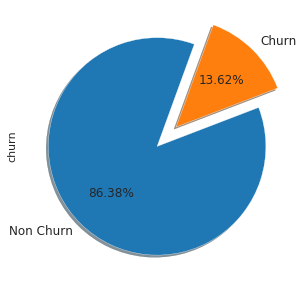

In [82]:
plt.figure(figsize = (10,5))
labels ="Non Churn", "Churn"

master_df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, fontsize=12, startangle=70)
plt.show()

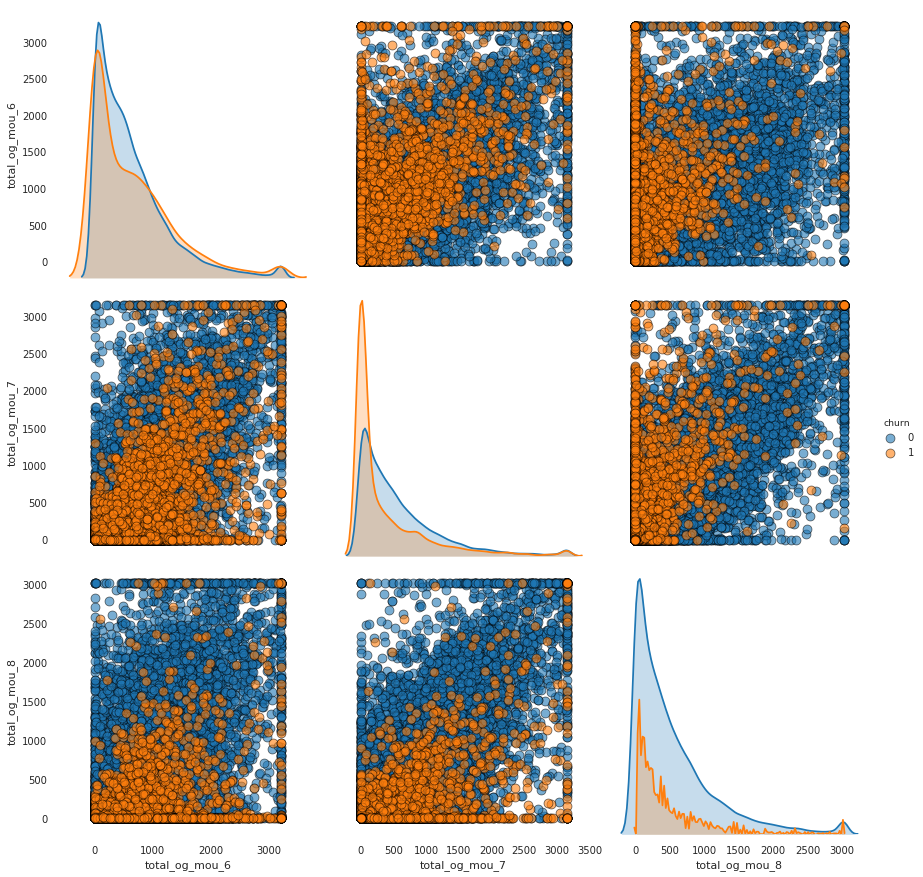

In [83]:
sns.pairplot(master_df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

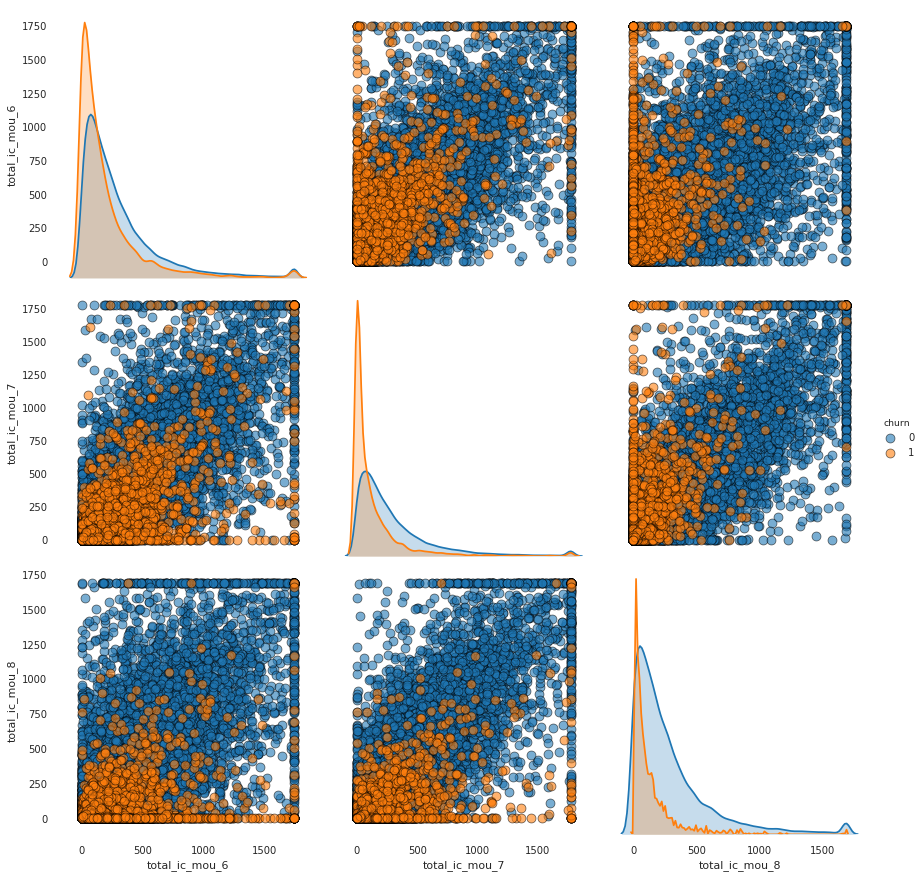

In [84]:
sns.pairplot(master_df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

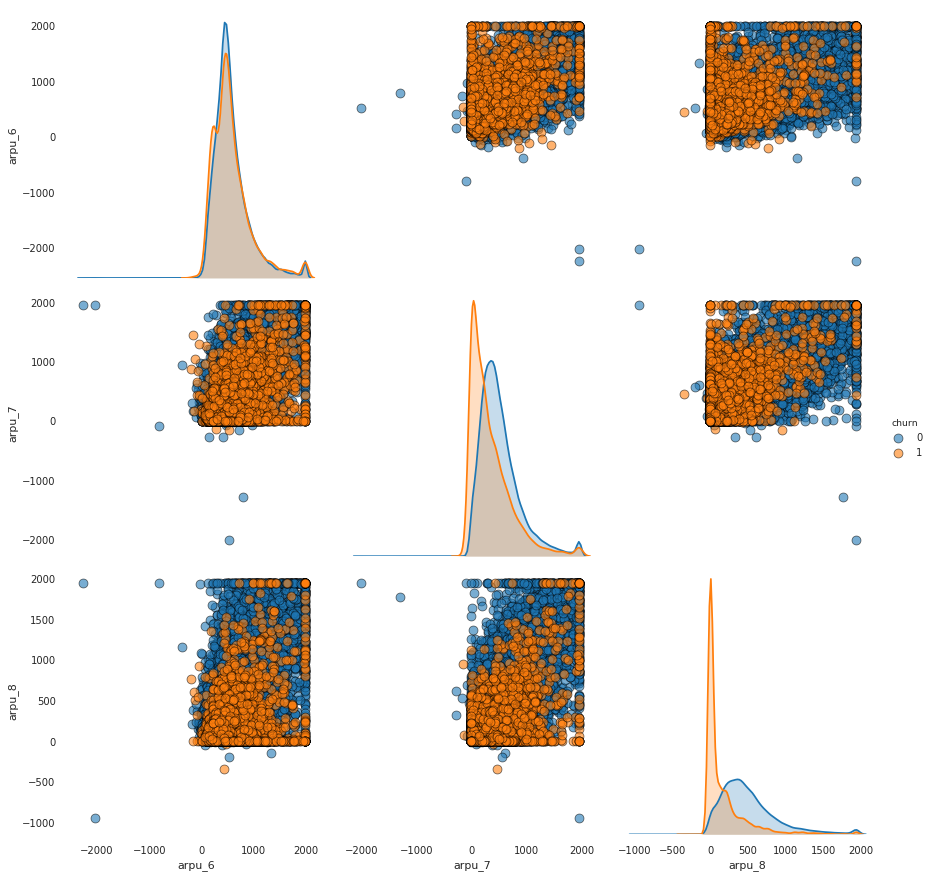

In [86]:
# Plot colored by arpu vs churn
sns.pairplot(master_df, 
             vars = ['arpu_6', 'arpu_7', 'arpu_8'], 
             hue = 'churn', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

In [87]:
# Function to draw scatter plot
def draw_scatter_plot(df, X, Y, xlabel, ylabel, width=5, height=5, xLblRotation=0, title=None, colors=(0,0,0), alpha=0.5):

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    area = np.pi*3
    plt.scatter(x=X, y=Y, data=df, s=area, c=colors, alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xLblRotation)
    plt.title(title)
    plt.show()

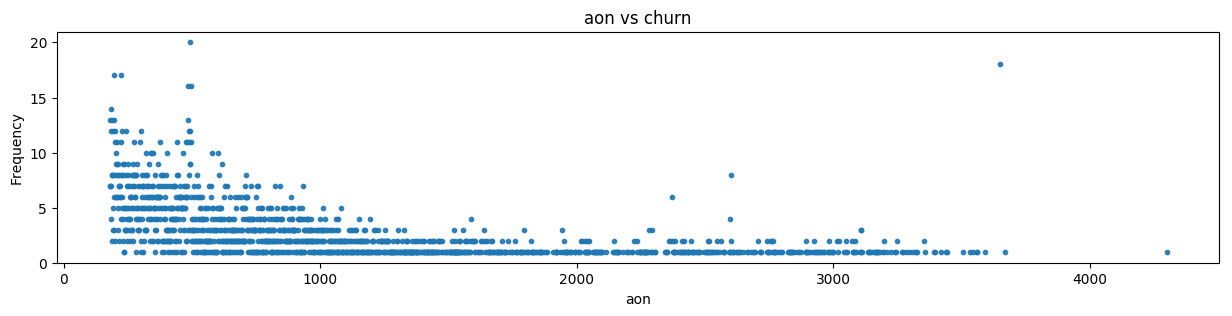

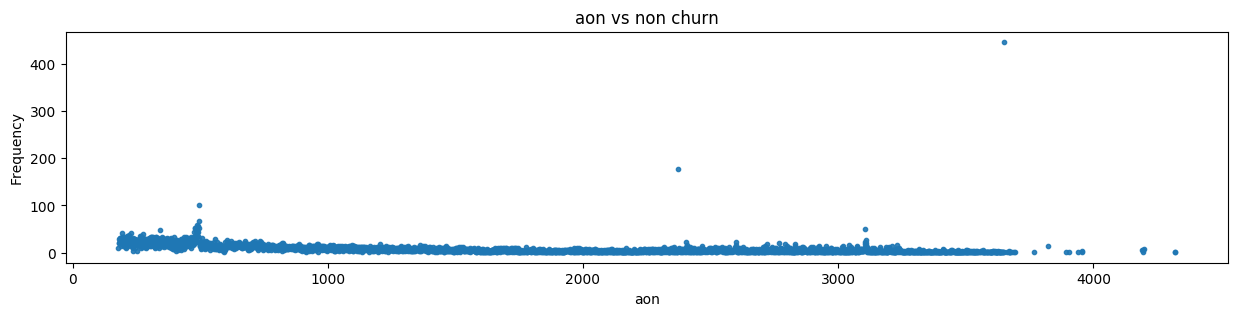

In [88]:
churn_aon_freq = churn_df.groupby(churn_df.aon).size().reset_index(name='Frequency')
non_churn_aon_freq = non_churn_df.groupby(non_churn_df.aon).size().reset_index(name='Frequency')

draw_scatter_plot(churn_aon_freq, "aon", "Frequency", "aon", "Frequency", 15, 3, 0,  'aon vs churn', None, 0.9)
draw_scatter_plot(non_churn_aon_freq, "aon", "Frequency", "aon", "Frequency", 15, 3, 0, 'aon vs non churn', None, 0.9)

### Univariate Analysis

    - Distribution Plot

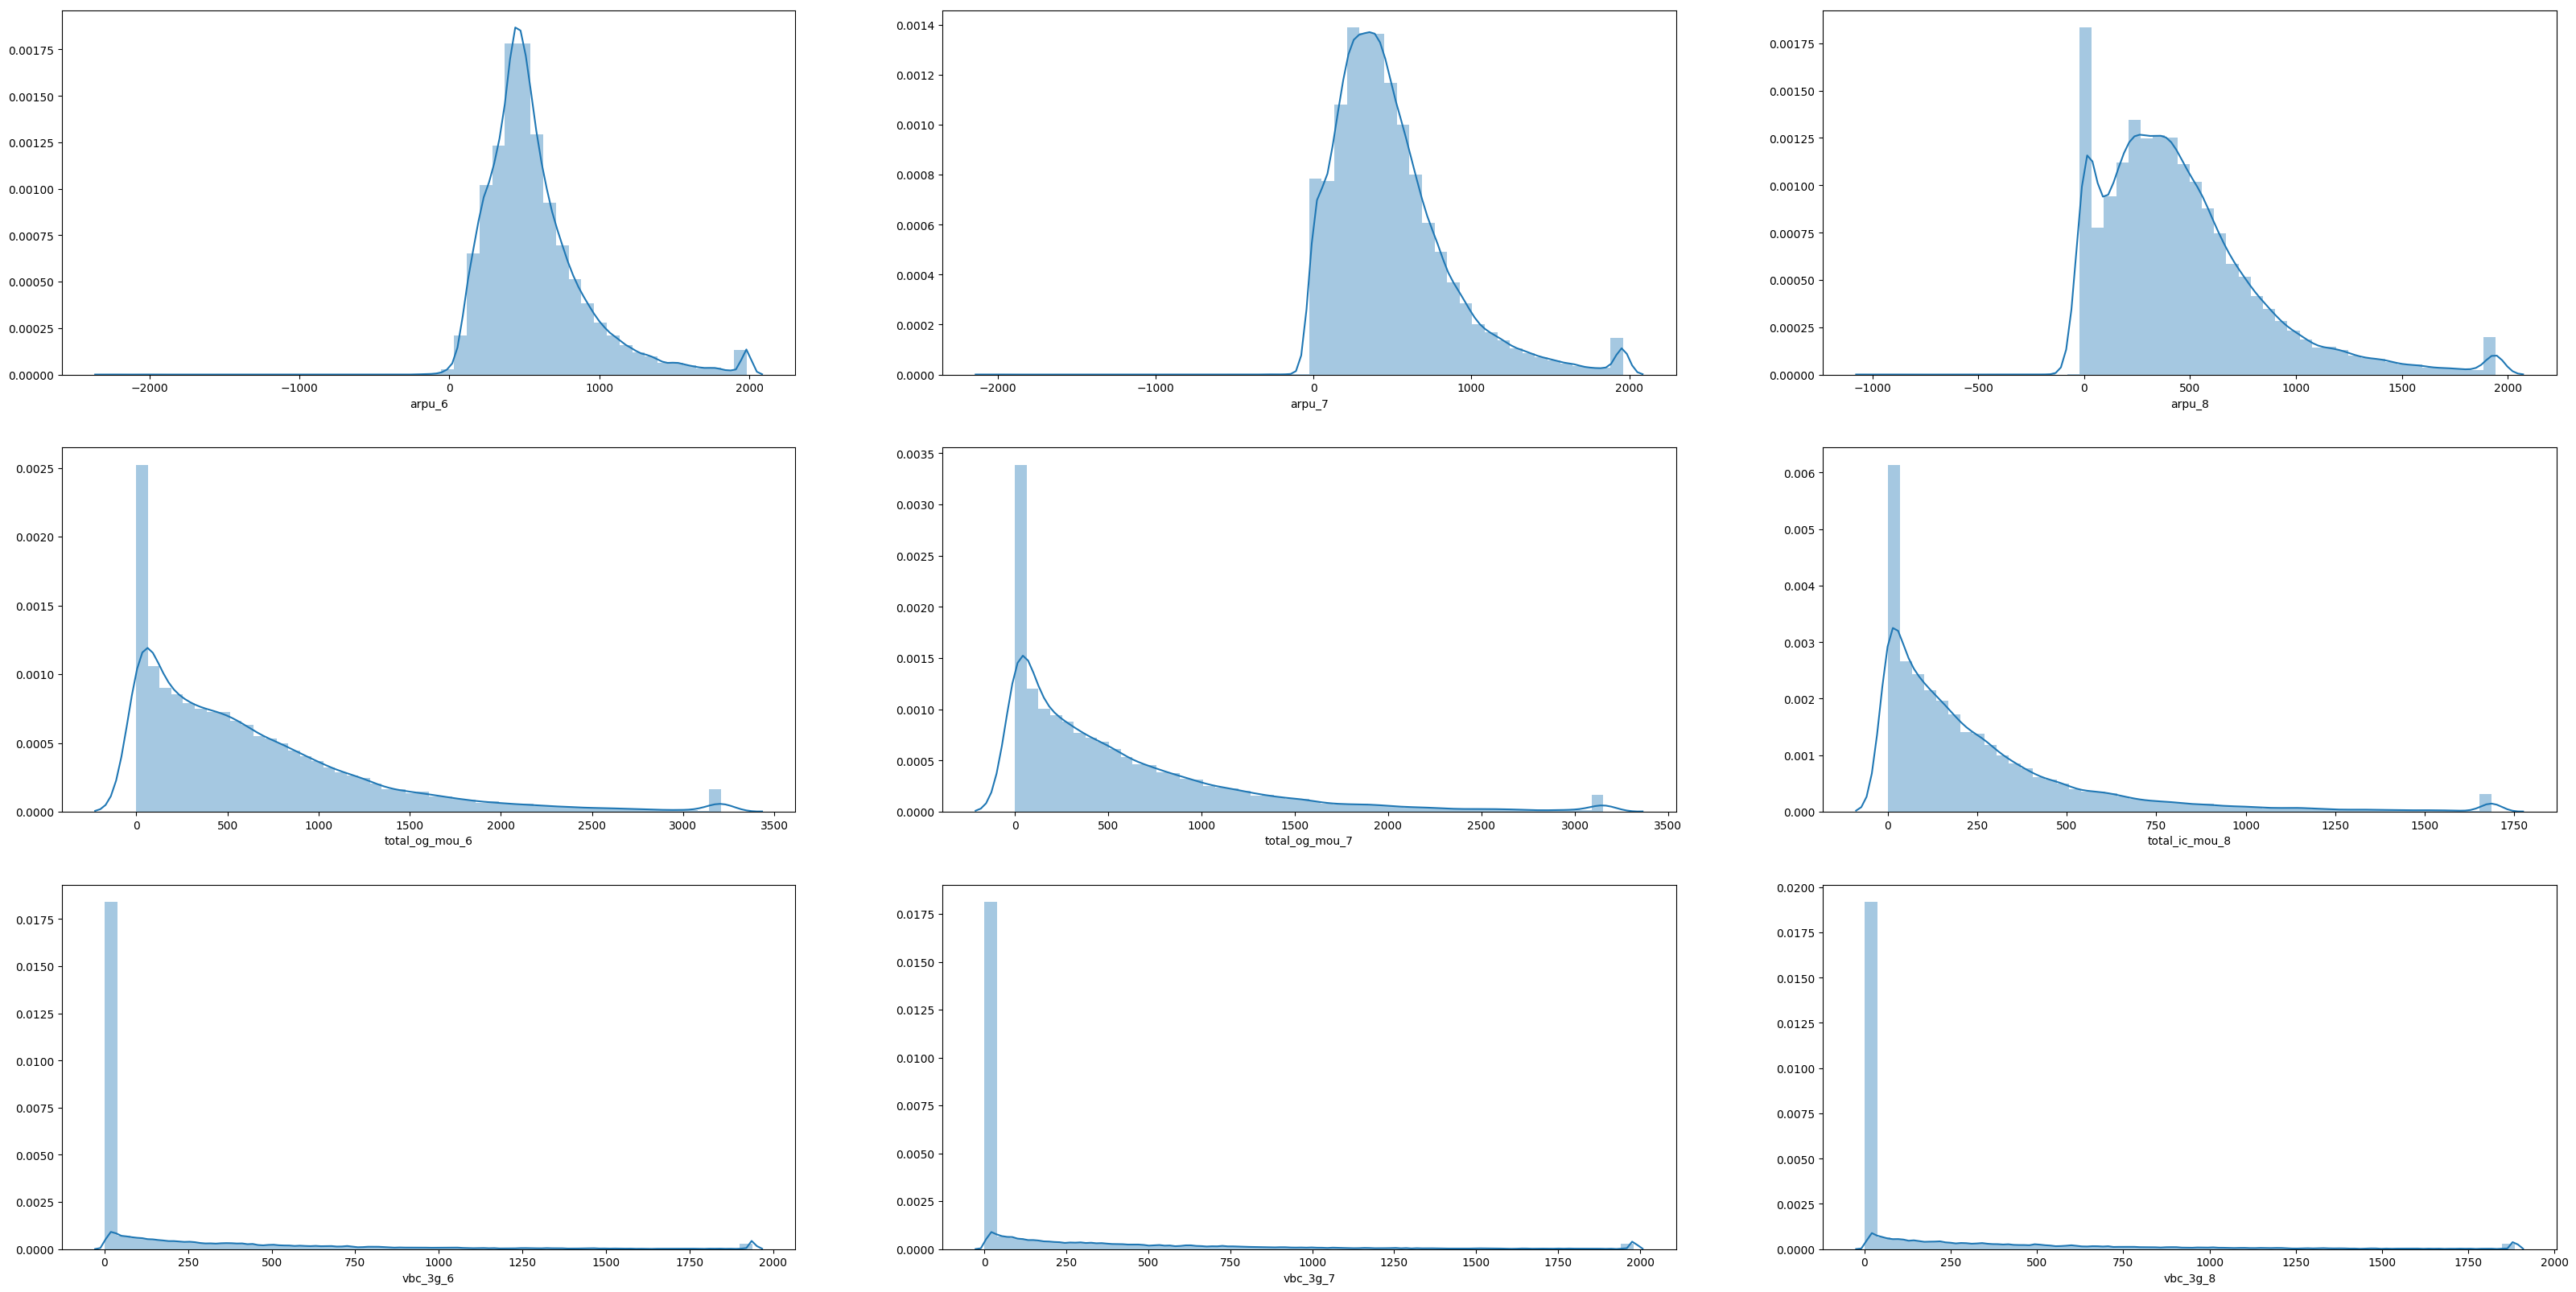

In [89]:
# Creating distplots to see few important attributes
plt.subplots(figsize=(40,20))

plt.subplot(3, 3, 1)
sns.distplot(master_df.arpu_6)

plt.subplot(3, 3, 2)
sns.distplot(master_df.arpu_7)

plt.subplot(3, 3, 3)
sns.distplot(master_df.arpu_8)

plt.subplot(3, 3, 4)
sns.distplot(master_df.total_og_mou_6)

plt.subplot(3, 3, 5)
sns.distplot(master_df.total_og_mou_7)

plt.subplot(3, 3, 6)
sns.distplot(master_df.total_ic_mou_8)

plt.subplot(3, 3, 7)
sns.distplot(master_df.vbc_3g_6)

plt.subplot(3, 3, 8)
sns.distplot(master_df.vbc_3g_7)

plt.subplot(3, 3, 9)
sns.distplot(master_df.vbc_3g_8)

plt.show()

    - Box Plots

<font size=4>Day of last recharge June </font>

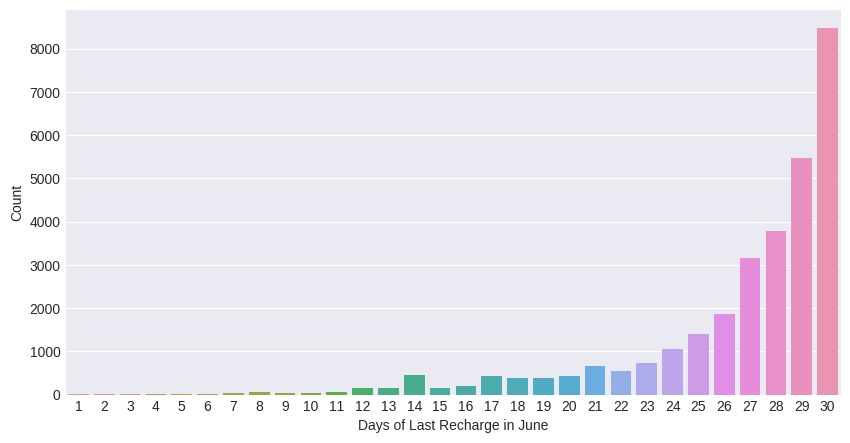

In [98]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_6", data=master_df)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Count')
plt.show()

<font size=4>Day of last recharge July </font>

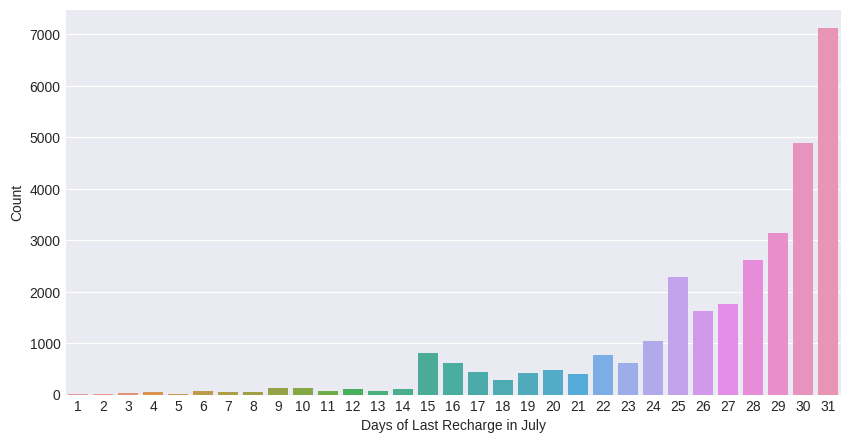

In [99]:
plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_7", data=master_df)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Count')
plt.show()

<font size=4>Day of last recharge August </font>

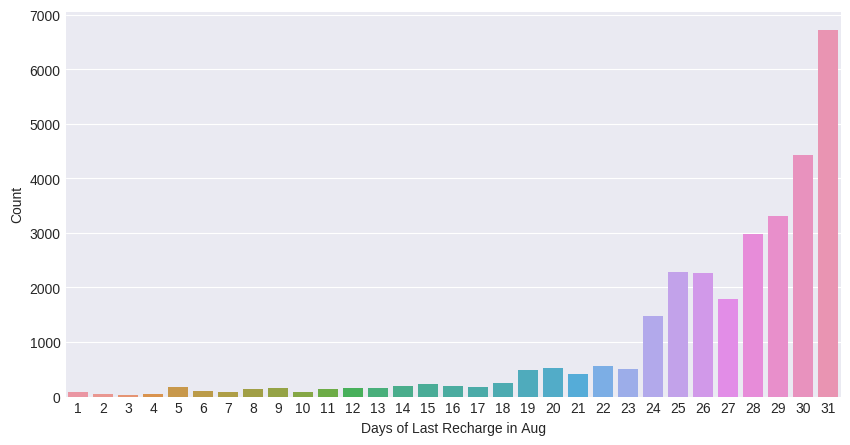

In [100]:

plt.figure(figsize = (10,5))
sns.countplot(x="day_of_last_rech_8", data=master_df)
plt.xlabel('Days of Last Recharge in Aug')
plt.ylabel('Count')
plt.show()

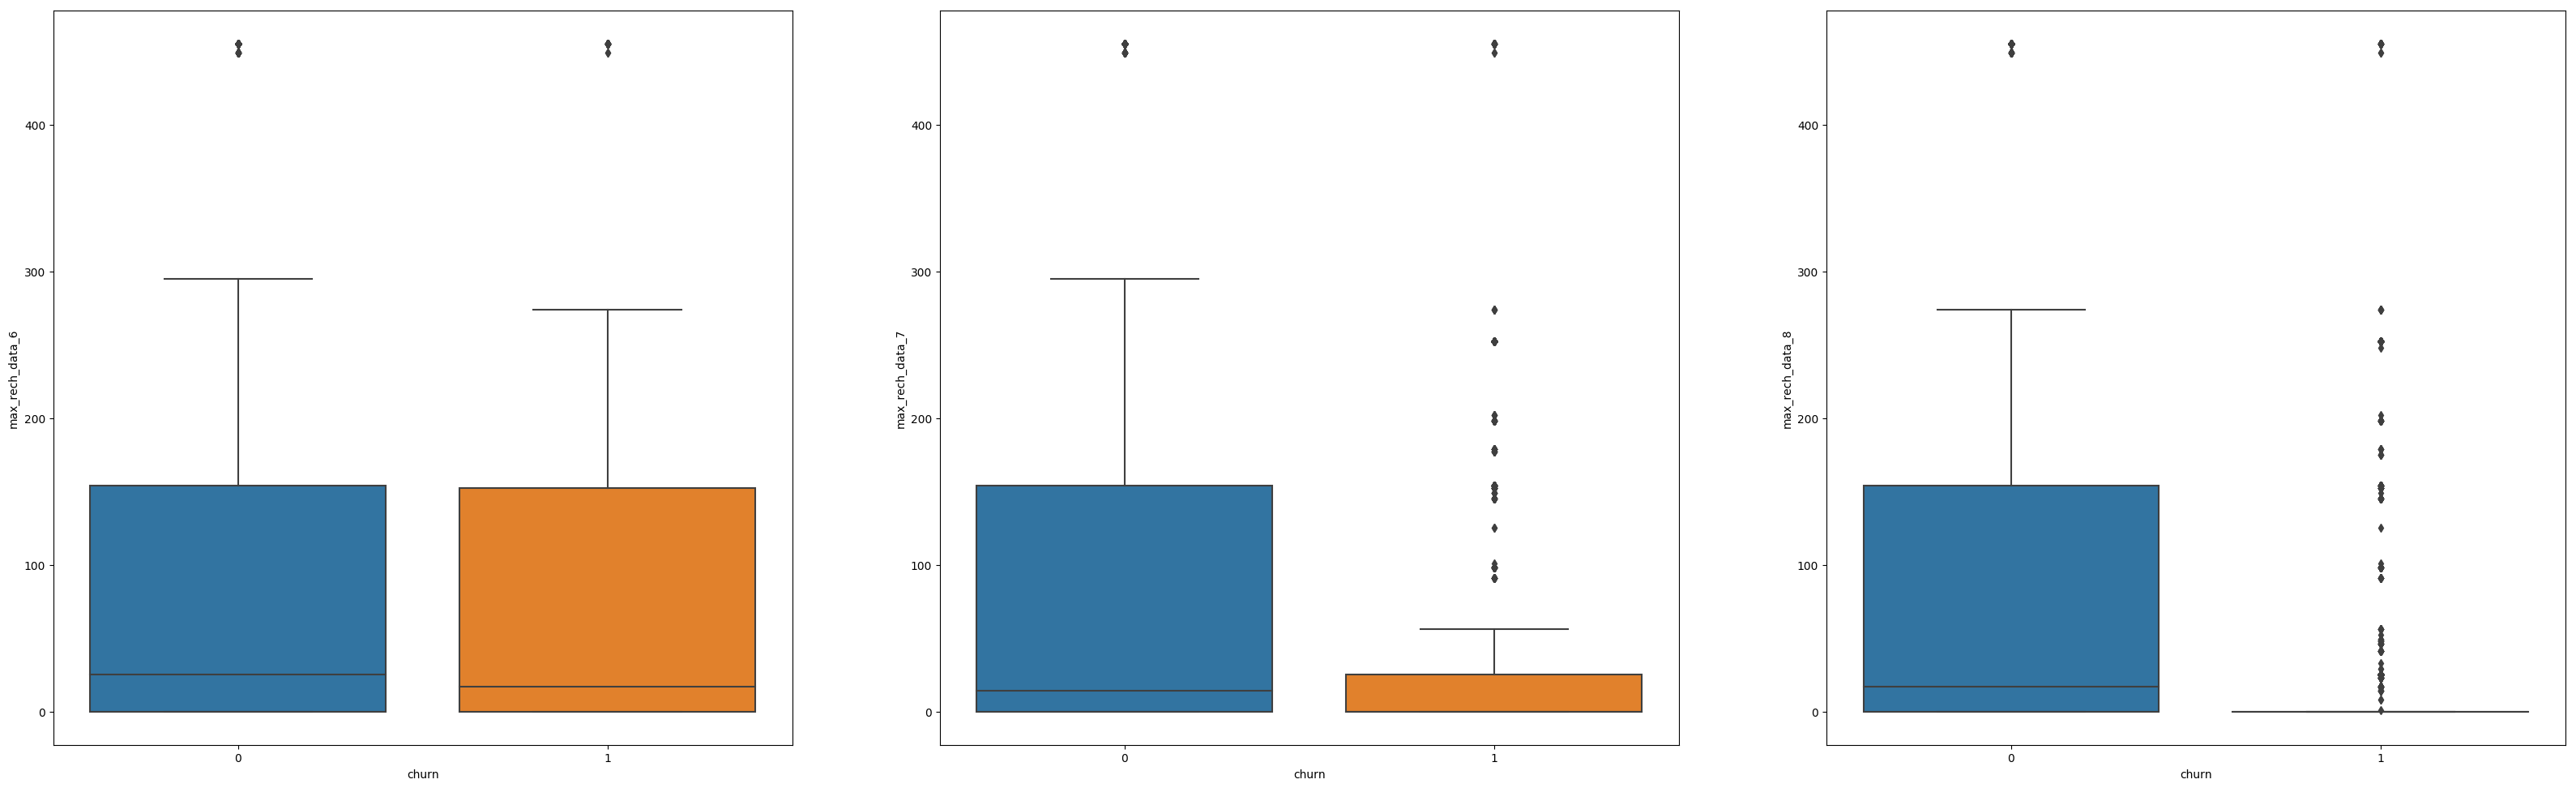

In [90]:
# Max_rech_data features plotting
plt.subplots(figsize=(40,40))

plt.subplot(3,3,1)
sns.boxplot(x='churn', y='max_rech_data_6', data = master_df)

plt.subplot(3,3,2)
sns.boxplot(x='churn', y='max_rech_data_7', data = master_df)

plt.subplot(3,3,3)
sns.boxplot(x='churn', y='max_rech_data_8', data = master_df)


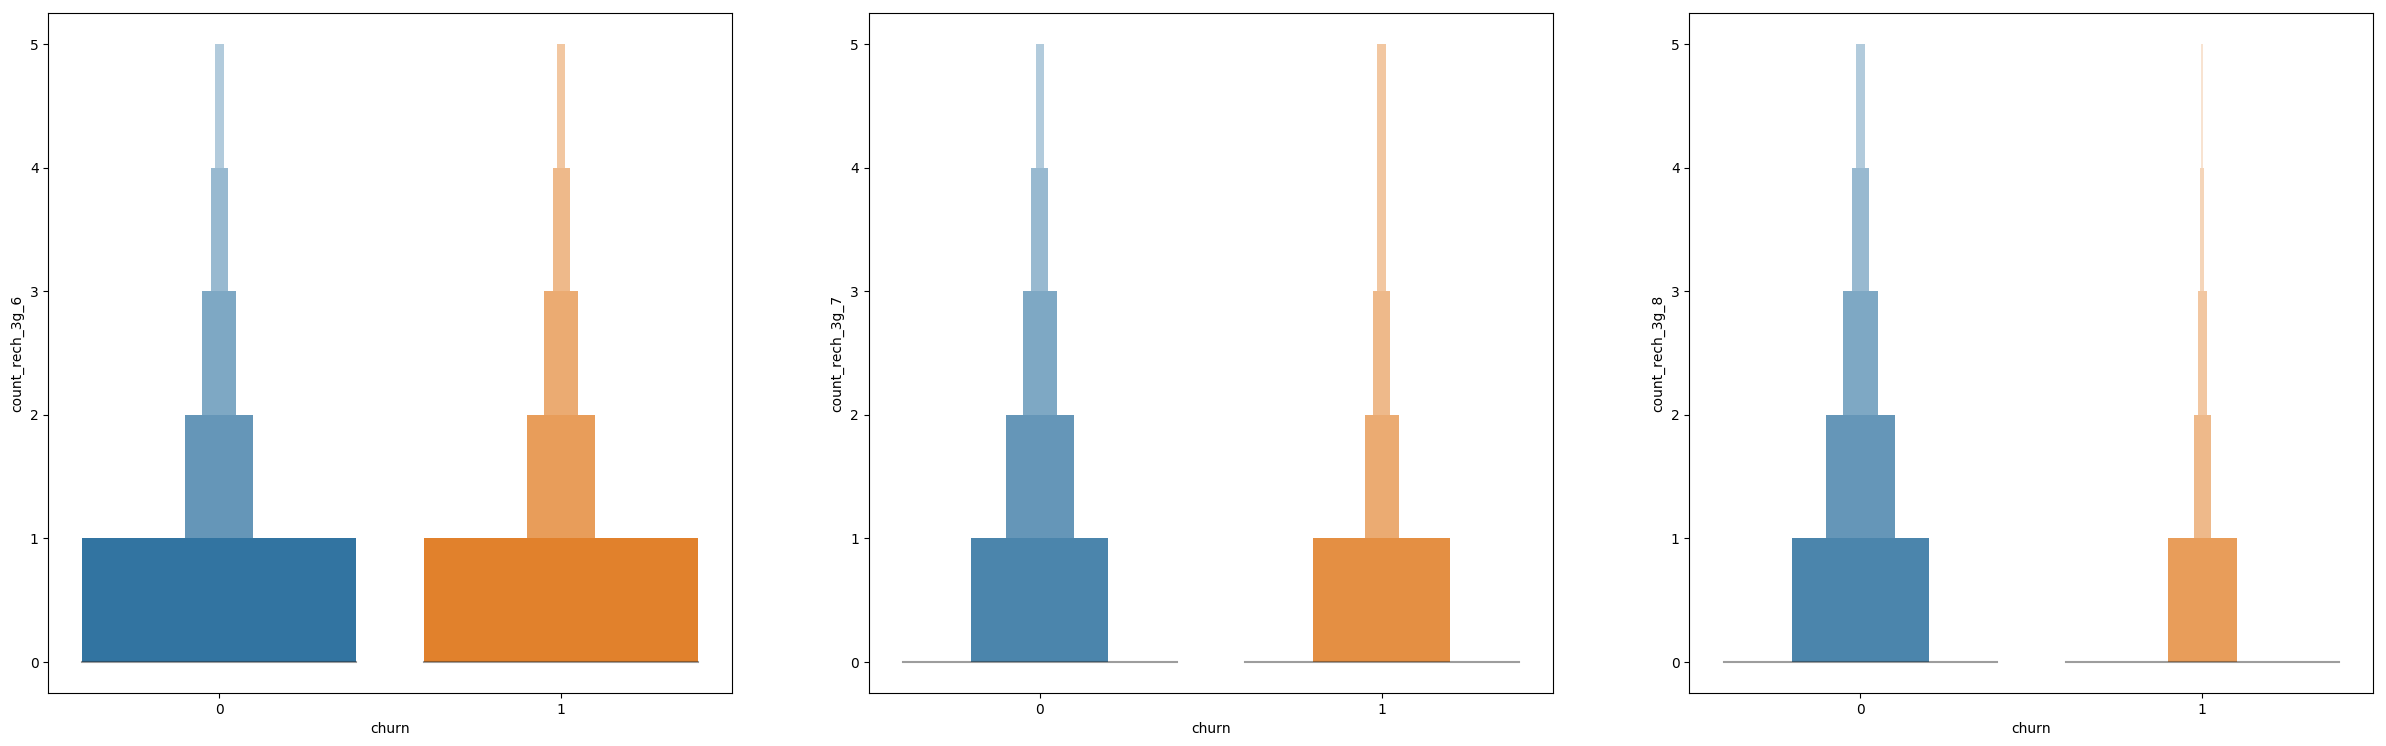

In [92]:
# count_rech_2g features plotting
fig = plt.figure(figsize=(30,30))

plt.subplot(3,3,1)
sns.boxenplot(x='churn', y='count_rech_3g_6', data = master_df)

plt.subplot(3,3,2)
sns.boxenplot(x='churn', y='count_rech_3g_7', data = master_df)

plt.subplot(3,3,3)
sns.boxenplot(x='churn', y='count_rech_3g_8', data = master_df)


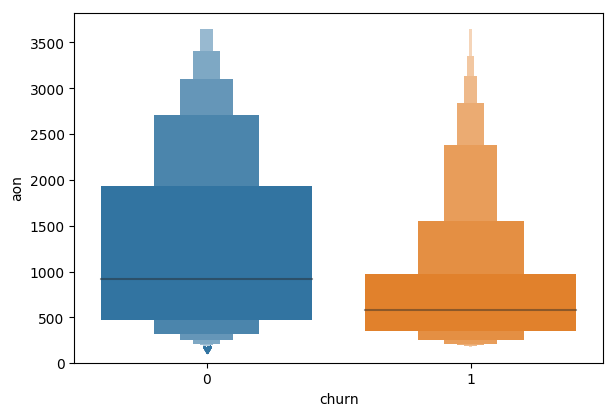

In [93]:
# count_rech_3g features plotting
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxenplot(x='churn', y='aon', data = master_df)

<font size=4> <b> Insights: </b> </font>
    - From above plots, we can see that for churned customers, AON is significantly less than non-churned customer

In [94]:
def graph_avgCallMonth(pltType,data,calltype,col):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with col features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[col].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
  
    plt.show()

### Segmented Univariate Analysis

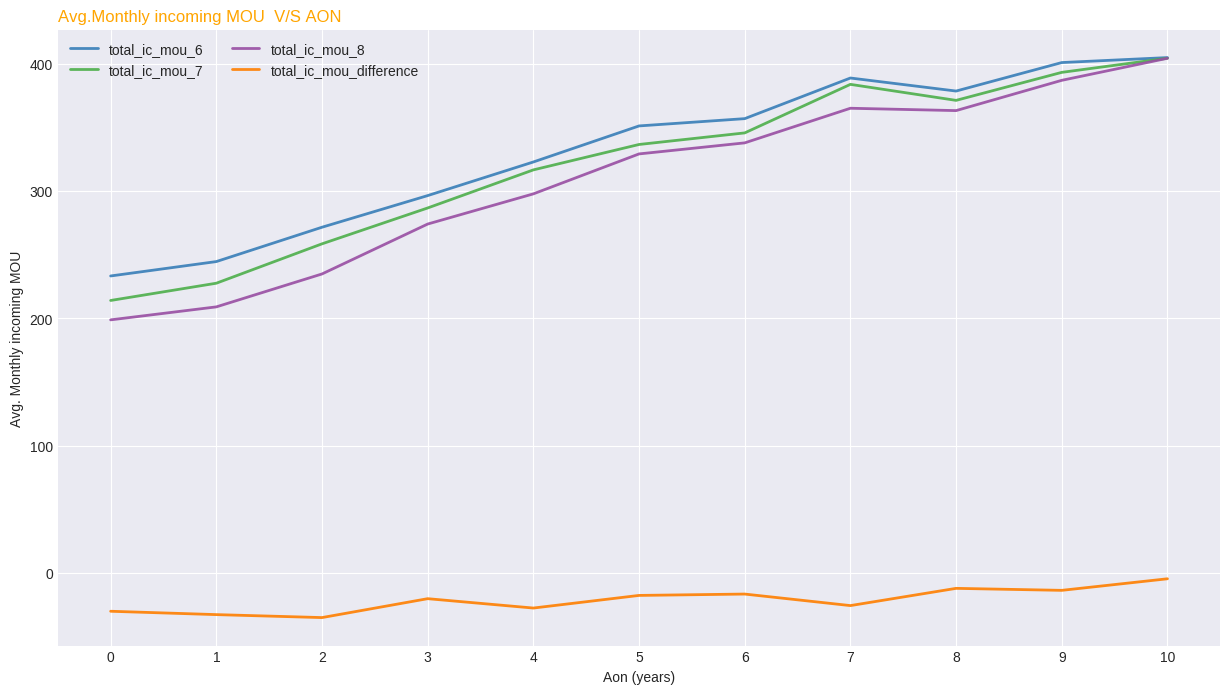

In [95]:
# Plotting Avg. total monthly incoming MOU vs AON
incoming_cal_columns = master_df.filter(regex ='total_ic_mou').columns

graph_avgCallMonth('multi',master_df,calltype='incoming',col=incoming_cal_columns)

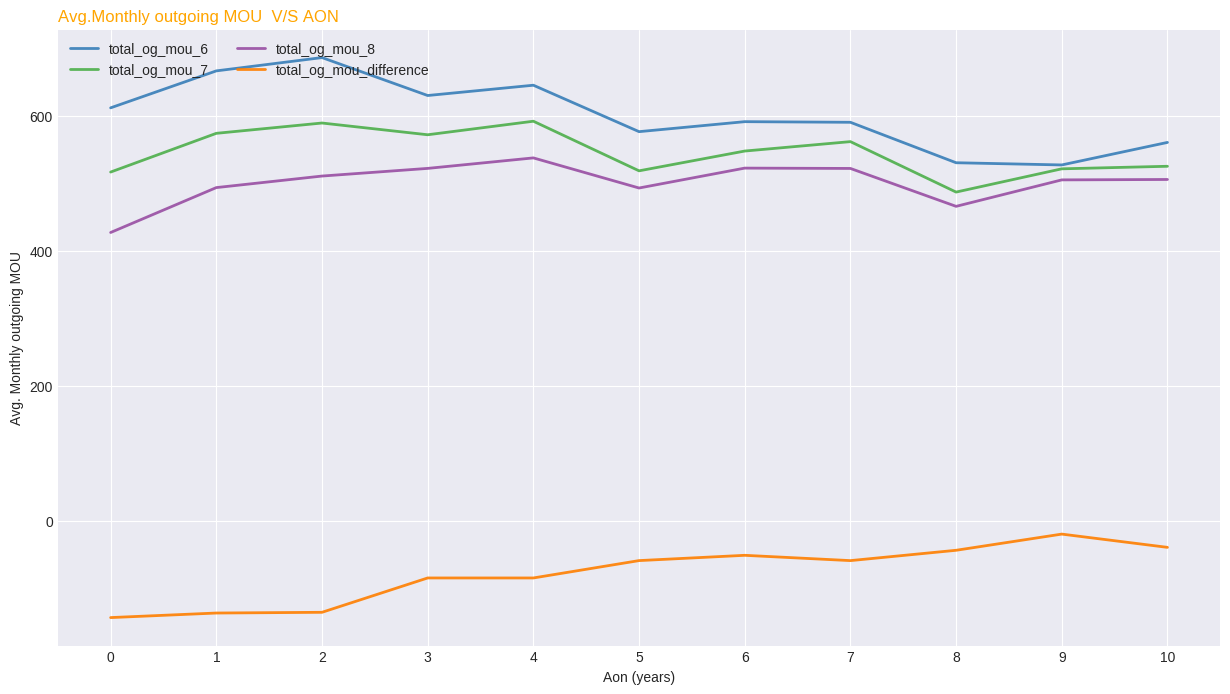

In [96]:
# Plotting Avg. total monthly outgoing MOU vs AON
outgoing_cal_columns = master_df.filter(regex ='total_og_mou').columns

graph_avgCallMonth('multi',master_df,calltype='outgoing',col=outgoing_cal_columns)

### Bivariate Analysis

<font size=4> Day of Last Recharge - June </font>

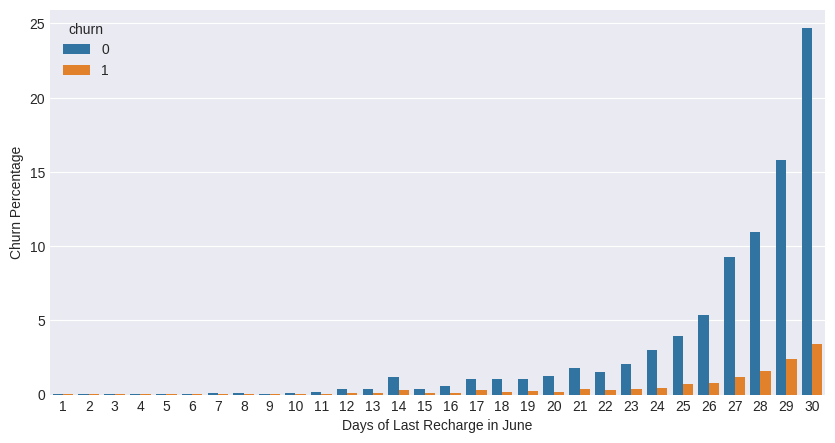

In [102]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_6", y="churn", hue="churn", data=master_df,
            estimator=lambda x: len(x) / len(master_df) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')
plt.show()

<font size=4> Day of last Recharge - July </font>

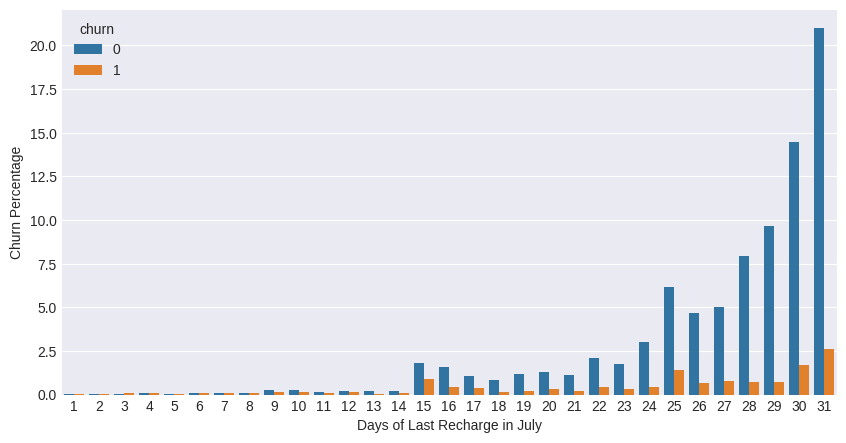

In [103]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_7", y="churn", hue="churn", data=master_df,
            estimator=lambda x: len(x) / len(master_df) * 100)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Churn Percentage')
plt.show()

<font size=4> Day of last Recharge - Aug </font>

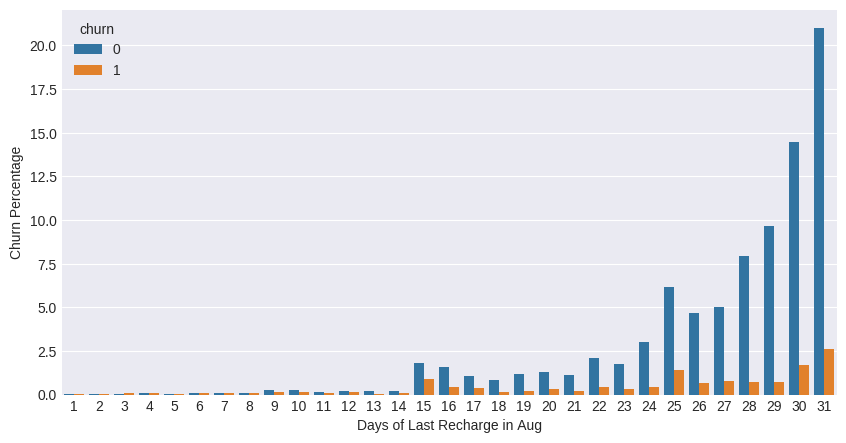

In [104]:
plt.figure(figsize = (10,5))
sns.barplot(x="day_of_last_rech_7", y="churn", hue="churn", data=master_df,
            estimator=lambda x: len(x) / len(master_df) * 100)
plt.xlabel('Days of Last Recharge in Aug')
plt.ylabel('Churn Percentage')
plt.show()

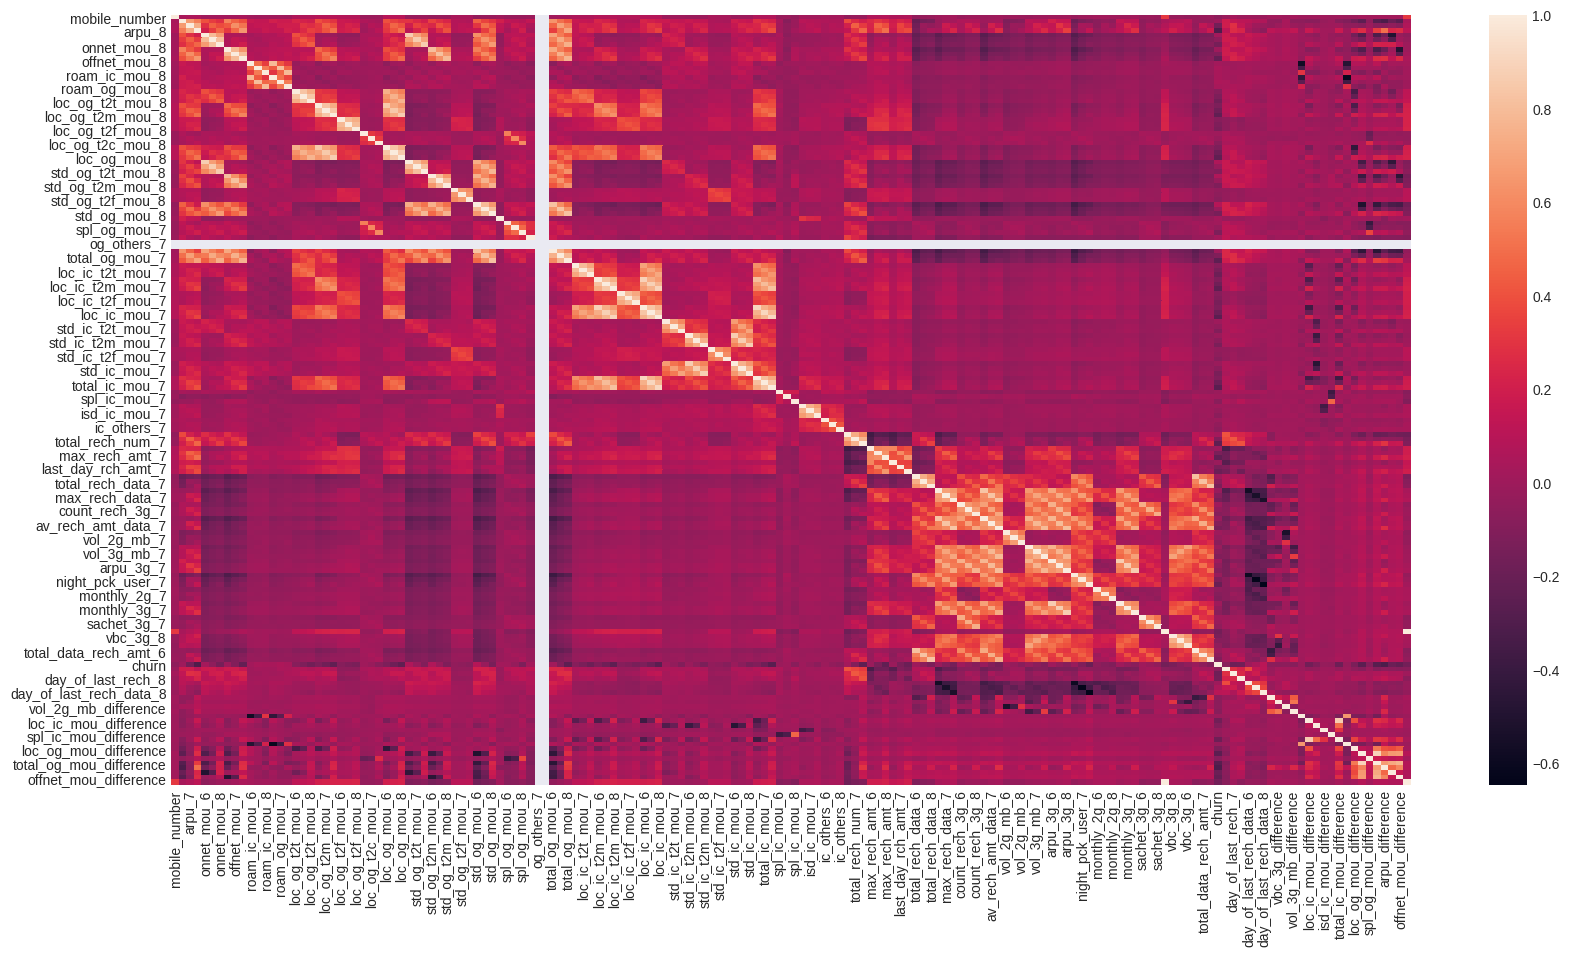

In [105]:
# Find correlation between columns
plt.figure(figsize=(20,10))
sns.heatmap(master_df.corr())
plt.show()

In [107]:
# Create correlation matrix
corr_matrix = master_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
corr_columns = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Correlated columns : \n {}'.format(corr_columns))

Correlated columns : 
 ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'aon_bin']


## Data Preparation for model

### Dividing Training data into X and Y sets for model building

In [108]:
X = master_df[master_df.columns[~master_df.columns.isin(['churn'])]]
y = master_df['churn']

### Count number of features

In [109]:
# Putting features
features = list(X.columns)
print('Total features : {}'.format(len(features)))

Total features : 163


### Splitting data into Training and Testing Sets

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 100)

print('Shape of training data : {}'.format(X_train.shape))
print('Percentage of churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 1]),len(y_train))))
print('Percentage of non-churn rows in training data : {}'
      .format(calculate_percentage(len(y_train[y_train == 0]),len(y_train))))
print('\n')
print('Shape of test data : {}'.format(X_test.shape))
print('Percentage of churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 1]),len(y_test))))
print('Percentage of non-churn rows in test data : {}'
      .format(calculate_percentage(len(y_test[y_test == 0]),len(y_test))))

Shape of training data : (21109, 163)
Percentage of churn rows in training data : 13.66
Percentage of non-churn rows in training data : 86.34


Shape of test data : (9047, 163)
Percentage of churn rows in test data : 13.51
Percentage of non-churn rows in test data : 86.49


<font size=4>What is an Imbalanced data?</font>

    - Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In [115]:
# Function to perform data balancing
def perform_smote(X_train, y_train):
    sm = SMOTE(random_state = 100)
    X_smote, y_smote = sm.fit_sample(X_train, y_train)
    
    X_train_smote = pd.DataFrame(X_smote, columns = X_train.columns)
    y_train_smote = pd.Series(y_smote)
    
    print('After SMOTE, number of values per class in training data : \n {} \n'
          .format(y_train_smote.value_counts()))
    
    return X_train_smote, y_train_smote


In [116]:
X_train_smote, y_train_smote = perform_smote(X_train, y_train)

After SMOTE, number of values per class in training data : 
 1    18225
0    18225
Name: churn, dtype: int64 



In [117]:
# Functions to do standard scaling and performing PCA on it
def standard_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return X_train_scaled, X_test_scaled

# Perform PCA
def perform_pca(X_train, X_test, scaled = False, incremental_pca = False, n_components = 110):
    if incremental_pca:
        pca = IncrementalPCA(n_components = n_components)
    else:
        pca = PCA(svd_solver='randomized', random_state = 100)
    
    if scaled:
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
    else:
        X_train_scaled, X_test_scaled = standard_scaling(X_train, X_test)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    return pca, X_train_pca, X_test_pca

In [120]:
# Function to Summarize Model
def summarize_model(y_true, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print('False Positive Rate : {}'.format(false_positive_rate))
    print('True Positive Rate : {}'.format(true_positive_rate))
    print('Thresholds : {}'.format(thresholds))
    print('ROC AUC Score : {}'.format(roc_auc))
    print('Accuracy Score : {}'.format(accuracy_score(y_true, y_pred)))
    print('Precision Score : {}'.format(precision_score(y_true, y_pred)))
    print('Recall Score : {}'.format(recall_score(y_true, y_pred)))
    print('F1 Score : {}'.format(f1_score(y_true, y_pred)))
    print('Confusion Matrix : \n {}'.format(confusion_matrix(y_true, y_pred)))
    print('Classification Report : \n {}'.format(classification_report(y_true, y_pred)))
    
    plt.figure(figsize=(6, 6))
    plt.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Model Building

<font size=4> <b> PCA </b> </font>

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing

    - Lets initialize PCA

In [119]:
from sklearn.decomposition import PCA, IncrementalPCA 
default_incremental_pca = IncrementalPCA()

## Logistic Regression 
    - Default Data
    - Without PCA

False Positive Rate : [0. 1.]
True Positive Rate : [0. 1.]
Thresholds : [1 0]
ROC AUC Score : 0.5
Accuracy Score : 0.8649276003094949
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
 [[7825    0]
 [1222    0]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      7825
           1       0.00      0.00      0.00      1222

    accuracy                           0.86      9047
   macro avg       0.43      0.50      0.46      9047
weighted avg       0.75      0.86      0.80      9047



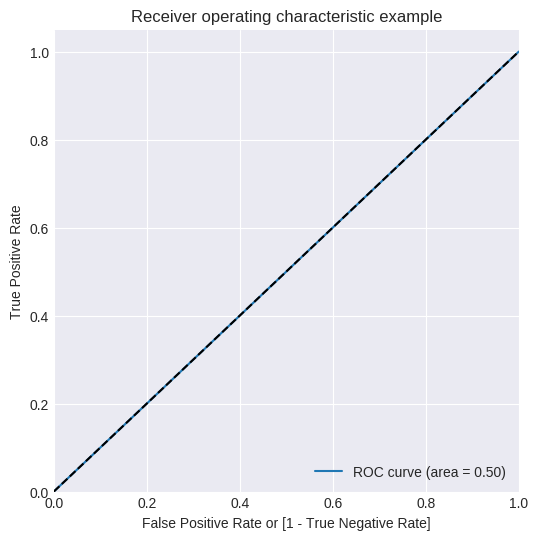

In [122]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

log_reg_default_model = LogisticRegression()
log_reg_default_model.fit(X_train, y_train)

y_pred_log_reg_default = log_reg_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_default)

    - With PCA

False Positive Rate : [0.         0.03361022 1.        ]
True Positive Rate : [0.         0.51800327 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7421965248401249
Accuracy Score : 0.9058251354040013
Precision Score : 0.7064732142857143
Recall Score : 0.5180032733224222
F1 Score : 0.5977337110481586
Confusion Matrix : 
 [[7562  263]
 [ 589  633]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7825
           1       0.71      0.52      0.60      1222

    accuracy                           0.91      9047
   macro avg       0.82      0.74      0.77      9047
weighted avg       0.90      0.91      0.90      9047



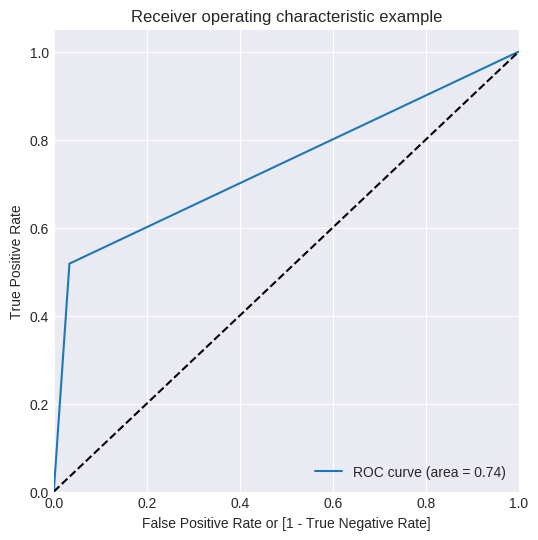

In [123]:
log_reg_default_pca, X_train_log_reg_default_pca, X_test_log_reg_default_pca = perform_pca(X_train, X_test)

log_reg_default_pca_model = LogisticRegression()
log_reg_default_pca_model.fit(X_train_log_reg_default_pca, y_train)

y_pred_log_reg_pca_default = log_reg_default_pca_model.predict(X_test_log_reg_default_pca)

summarize_model(y_test, y_pred_log_reg_pca_default)

<font size=4>Logistic Regression</font>  
    - SMOTE DATA
    - Without PCA

False Positive Rate : [0. 1.]
True Positive Rate : [0. 1.]
Thresholds : [1 0]
ROC AUC Score : 0.5
Accuracy Score : 0.8649276003094949
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
 [[7825    0]
 [1222    0]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      7825
           1       0.00      0.00      0.00      1222

    accuracy                           0.86      9047
   macro avg       0.43      0.50      0.46      9047
weighted avg       0.75      0.86      0.80      9047



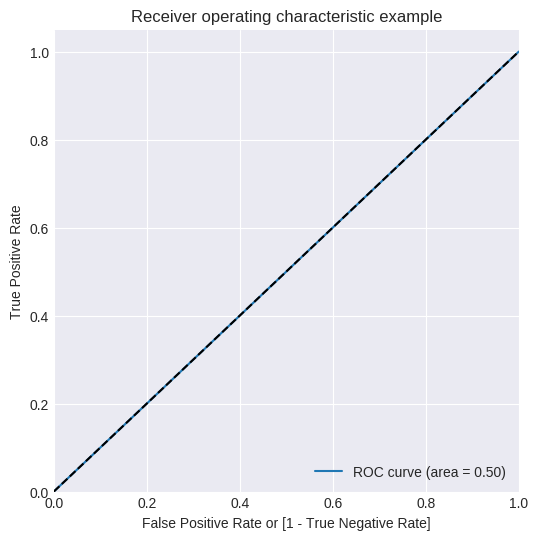

In [124]:
log_reg_smote_default_model = LogisticRegression()
log_reg_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_log_reg_smote_default = log_reg_smote_default_model.predict(X_test)

summarize_model(y_test, y_pred_log_reg_smote_default)

    - SMOTE DATA
    - With PCA

False Positive Rate : [0.         0.13929712 1.        ]
True Positive Rate : [0.        0.7806874 1.       ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8206951365540178
Accuracy Score : 0.8498949928152979
Precision Score : 0.46673189823874756
Recall Score : 0.7806873977086743
F1 Score : 0.5842008573178199
Confusion Matrix : 
 [[6735 1090]
 [ 268  954]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      7825
           1       0.47      0.78      0.58      1222

    accuracy                           0.85      9047
   macro avg       0.71      0.82      0.75      9047
weighted avg       0.89      0.85      0.86      9047



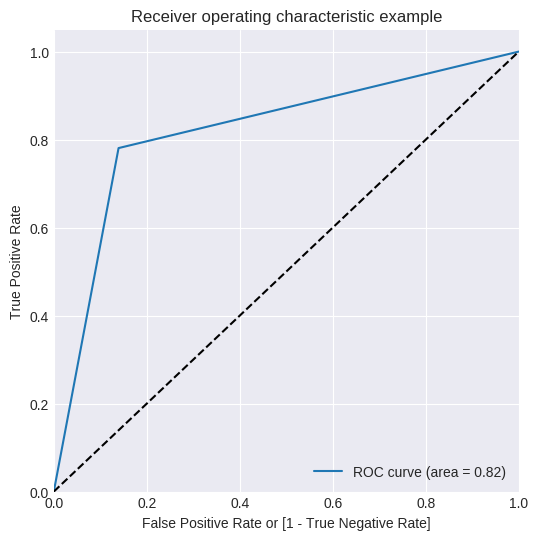

In [125]:
log_reg_smote_default_pca,\
X_train_log_reg_smote_default_pca, X_test_log_reg_smote_default_pca = perform_pca(X_train_smote, X_test)

log_reg_smote_default_pca_model = LogisticRegression()
log_reg_smote_default_pca_model.fit(X_train_log_reg_smote_default_pca, y_train_smote)

y_pred_log_reg_smote_default_pca = log_reg_smote_default_pca_model.predict(X_test_log_reg_smote_default_pca)

summarize_model(y_test, y_pred_log_reg_smote_default_pca)

<font size=4>Insights:</font>
    - From with and without class imbalance handling techniques, we can see smote balanced data with PCA has better Recall and other parameters. So, SMOTE data with PCA for hyperparameter tuning for performance gains

<font size=4> Plotting Principal Components chart </font>

In [127]:
# Function to plot principal Components:
def pca_3D_plot(ax, X_train_pca, y_train, title):
    ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))
    ax.set_title(title)
    ax.set_xlabel('Principal Component 3')
    ax.set_ylabel('Principal Component 1')
    ax.set_zlabel('Principal Component 2')

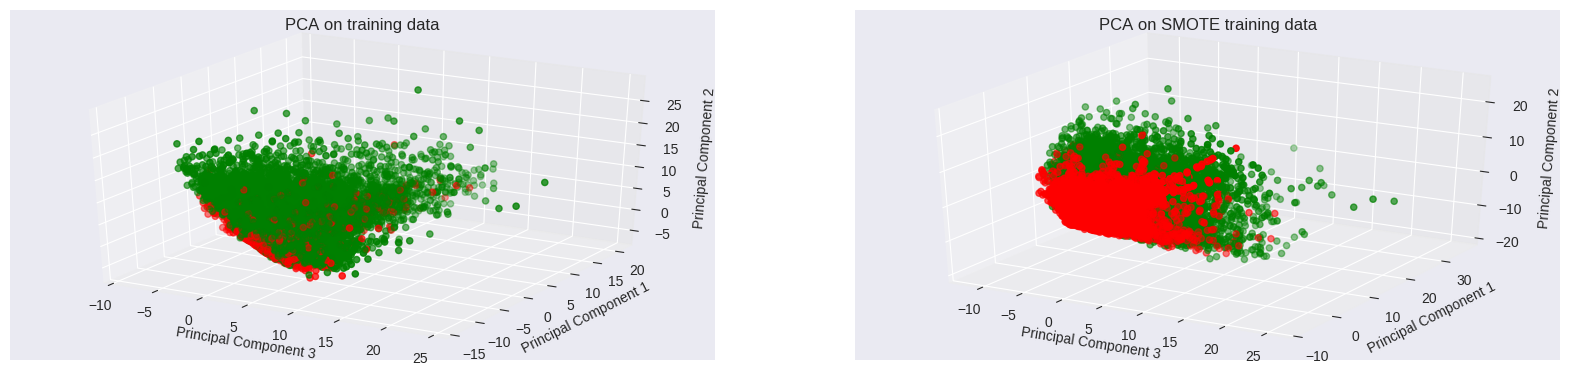

In [128]:
fig = plt.figure(figsize=(20,10))

pca_ax1 = fig.add_subplot(2, 2, 1, projection='3d')
pca_3D_plot(pca_ax1, X_train_log_reg_default_pca, y_train,'PCA on training data')

pca_ax2 = fig.add_subplot(2, 2, 2, projection='3d')
pca_3D_plot(pca_ax2, X_train_log_reg_smote_default_pca, y_train_smote, 'PCA on SMOTE training data')

plt.show()

<font size=4> Scree Plots </font>

In [129]:
def cumulative_explained_variance_plot(subplot, title, pca):
    subplot.set_xlabel('Principal Component')
    subplot.set_ylabel('Cumulative Explained Variance')
    subplot.set_title(title)
    subplot.plot(np.cumsum(log_reg_default_pca.explained_variance_ratio_))

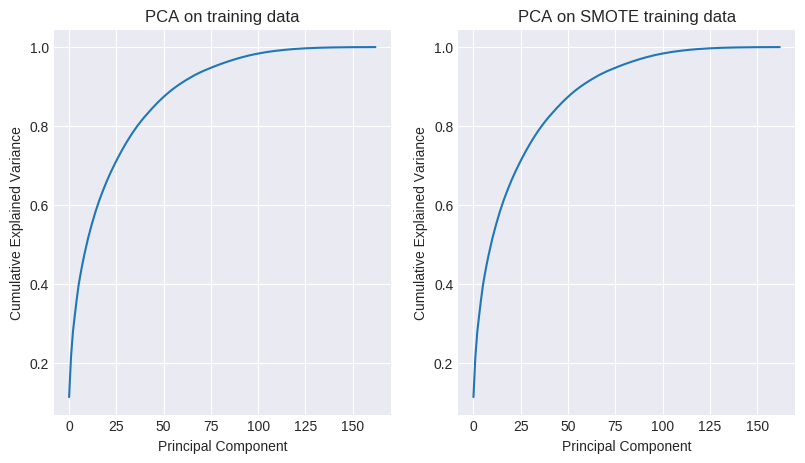

In [130]:
fig = plt.figure(figsize = (20,5))

pca_subplot1 = fig.add_subplot(141)
cumulative_explained_variance_plot(pca_subplot1, 'PCA on training data', log_reg_default_pca)

pca_subplot2 = fig.add_subplot(142)
cumulative_explained_variance_plot(pca_subplot2, 'PCA on SMOTE training data', log_reg_smote_default_pca)

plt.show()

<font size=4> Cross-check CEV for Principal Components</font>

In [131]:
explained_variance_df = pd.DataFrame(np.cumsum(log_reg_default_pca.explained_variance_ratio_), columns = ['default_cev'])
explained_variance_df['smote_cev'] = np.cumsum(log_reg_smote_default_pca.explained_variance_ratio_)
explained_variance_df.index = np.arange(1, len(explained_variance_df) + 1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(explained_variance_df)

default_cev  smote_cev
1           0.11       0.11
2           0.22       0.23
3           0.28       0.28
4           0.32       0.33
5           0.36       0.37
6           0.40       0.40
7           0.42       0.43
8           0.45       0.45
9           0.47       0.48
10          0.50       0.50
11          0.52       0.52
12          0.53       0.54
13          0.55       0.55
14          0.57       0.57
15          0.58       0.58
16          0.60       0.60
17          0.61       0.61
18          0.63       0.62
19          0.64       0.64
20          0.65       0.65
21          0.66       0.66
22          0.67       0.67
23          0.68       0.68
24          0.69       0.69
25          0.70       0.70
26          0.71       0.71
27          0.72       0.72
28          0.73       0.73
29          0.74       0.74
30          0.75       0.75
31          0.76       0.75
32          0.76       0.76
33          0.77       0.77
34          0.78       0.78
35          0.79       0.78
36          0.79       0.79
37          0.80       0.80
38          0.81       0.80
39          0.81       0.81
40          0.82       0.82
41          0.82       0.82
42          0.83       0.83
43          0.83       0.83
44          0.84       0.84
45          0.85       0.84
46          0.85       0.85
47          0.86       0.85
48          0.86       0.86
49          0.87       0.86
50          0.87       0.87
51          0.87       0.87
52          0.88       0.88
53          0.88       0.88
54          0.89       0.88
55          0.89       0.89
56          0.89       0.89
57          0.90       0.89
58          0.90       0.90
59          0.90       0.90
60          0.91       0.91
61          0.91       0.91
62          0.91       0.91
63          0.92       0.91
64          0.92       0.92
65          0.92       0.92
66          0.93       0.92
67          0.93       0.93
68          0.93       0.93
69          0.93       0.93
70          0.94       0.93
71          0.94       0.94
72          0.94       0.94
73          0.94       0.94
74          0.94       0.94
75          0.95       0.94
76          0.95       0.95
77          0.95       0.95
78          0.95       0.95
79          0.95       0.95
80          0.96       0.95
81          0.96       0.96
82          0.96       0.96
83          0.96       0.96
84          0.96       0.96
85          0.96       0.96
86          0.97       0.96
87          0.97       0.97
88          0.97       0.97
89          0.97       0.97
90          0.97       0.97
91          0.97       0.97
92          0.97       0.97
93          0.97       0.97
94          0.98       0.98
95          0.98       0.98
96          0.98       0.98
97          0.98       0.98
98          0.98       0.98
99          0.98       0.98
100         0.98       0.98
101         0.98       0.98
102         0.98       0.98
103         0.99       0.99
104         0.99       0.99
105         0.99       0.99
106         0.99       0.99
107         0.99       0.99
108         0.99       0.99
109         0.99       0.99
110         0.99       0.99
111         0.99       0.99
112         0.99       0.99
113         0.99       0.99
114         0.99       0.99
115         0.99       0.99
116         0.99       0.99
117         0.99       0.99
118         0.99       0.99
119         0.99       0.99
120         1.00       1.00
121         1.00       1.00
122         1.00       1.00
123         1.00       1.00
124         1.00       1.00
125         1.00       1.00
126         1.00       1.00
127         1.00       1.00
128         1.00       1.00
129         1.00       1.00
130         1.00       1.00
131         1.00       1.00
132         1.00       1.00
133         1.00       1.00
134         1.00       1.00
135         1.00       1.00
136         1.00       1.00
137         1.00       1.00
138         1.00       1.00
139         1.00       1.00
140         1.00       1.00
141         1.00       1.00
142         1.00       1.00
1

<font size=4> Data Preparation </font>

In [134]:
X_train_log_reg_smote_scaled, X_test_log_reg_smote_scaled = standard_scaling(X_train_smote,X_test)

<font size=4>Initialize parameters and set pipeline </font>

In [135]:
from sklearn.pipeline import Pipeline

log_reg_pca_components = range(7, X_train.shape[1] + 1, 10)

log_reg_parameters = {'pca__n_components': log_reg_pca_components}

log_regression = LogisticRegression(n_jobs = -1)

log_reg_pipeline = Pipeline(steps=[('pca', default_incremental_pca),('log_regression', log_regression)])

<font size=4> Hyperparameters Tuning</font>

In [139]:
# Functions to create GRID Search
def create_grid_search(pipeline, parameters, scoring=['precision','recall', 'f1', 'roc_auc'], 
                        cv_fold_split = 5, refit = 'roc_auc'):
    folds = KFold(n_splits = cv_fold_split, shuffle = True, random_state = 100)
    
    display(parameters)

    grid_search = GridSearchCV(pipeline, cv = folds, param_grid = parameters,
                               scoring = scoring,
                               return_train_score = True, verbose = True,
                               refit = refit)
    
    return grid_search

# Function to perform GRID Search
def conduct_grid_search(grid_search, X_train, y_train, display_results = False):
    with parallel_backend('threading'):
        grid_search.fit(X_train, y_train)
        
    print('Best {} score after hyperparameters tuning : {}'.format(grid_search.refit, grid_search.best_score_))
    print('Best parameters after hyperparameters tuning for {} score : {}'\
          .format(grid_search.refit, grid_search.best_params_))

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
    if display_results:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(cv_results)
        
    return cv_results

In [141]:
from sklearn.utils import resample, parallel_backend 

log_reg_grid_search = create_grid_search(log_reg_pipeline, log_reg_parameters)
log_reg_cv_results = conduct_grid_search(log_reg_grid_search, X_train_log_reg_smote_scaled, y_train_smote)

{'pca__n_components': range(7, 164, 10)}

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


Best roc_auc score after hyperparameters tuning : 0.9365398818813018
Best parameters after hyperparameters tuning for roc_auc score : {'pca__n_components': 157}


<font size=4> Validating Hyperparameter tuning results </font>

In [142]:
# Function to plot parameters
def plot_hyperparameters_subplot(dataframe, param, ax, xlabel, title = ''):
    if title:
        ax.set_title(title)
    else:
        ax.set_title('{} - AUC Score: Test vs Train'.format(xlabel))
        
    ax.plot(dataframe[param], 
         dataframe.mean_test_roc_auc, color='g')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Mean Test AUC Score', color='g')

    ax2 = ax.twinx()
    ax2.plot(dataframe[param], 
             dataframe.mean_test_recall, color='r')
    ax2.set_ylabel('Mean Test Recall Score', color='r')

def plot_hyperparameters(dataframe, param, xlabel):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    plot_hyperparameters_subplot(dataframe, param, ax1, xlabel)
    plt.show()

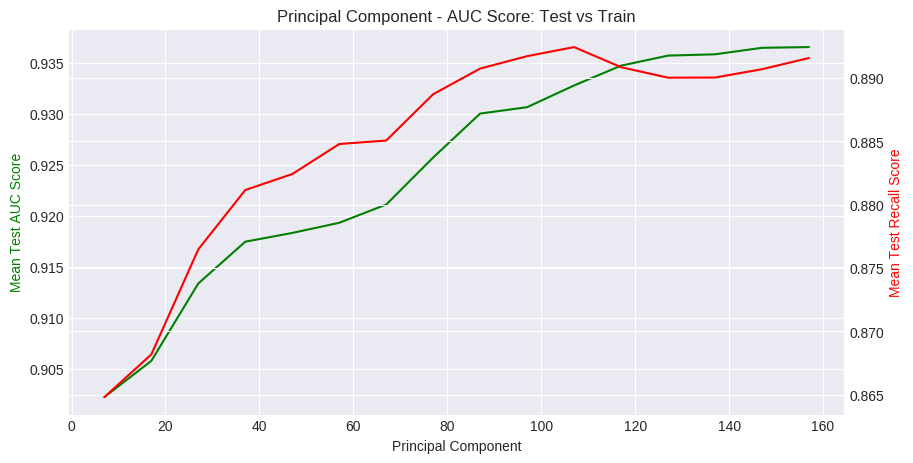

In [143]:
plot_hyperparameters(log_reg_cv_results, 'param_pca__n_components', 'Principal Component')

<font size=4> Final Logistic Regression Model</font>

False Positive Rate : [0.         0.13865815 1.        ]
True Positive Rate : [0.         0.77986907 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8206054600691267
Accuracy Score : 0.8503371283298331
Precision Score : 0.4676153091265947
Recall Score : 0.7798690671031097
F1 Score : 0.5846625766871166
Confusion Matrix : 
 [[6740 1085]
 [ 269  953]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      7825
           1       0.47      0.78      0.58      1222

    accuracy                           0.85      9047
   macro avg       0.71      0.82      0.75      9047
weighted avg       0.89      0.85      0.86      9047



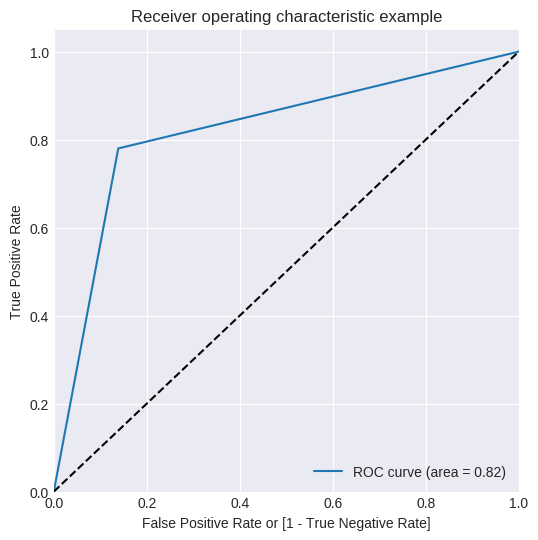

In [144]:
log_reg_pca, X_train_log_reg_pca, X_test_log_reg_pca = perform_pca(X_train_smote, X_test, 
                                                                   incremental_pca = True, n_components = 157)

final_log_reg = LogisticRegression()
final_log_reg.fit(X_train_log_reg_pca, y_train_smote)

y_pred_log_reg = final_log_reg.predict(X_test_log_reg_pca)
summarize_model(y_test, y_pred_log_reg)

<font size=4> ROC Curve</font>

An ROC curve demonstrates several things:

    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

## Decision Tree Classifier

    - Default Data
    - Without PCA

False Positive Rate : [0.         0.06811502 1.        ]
True Positive Rate : [0.         0.59001637 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7609506753188351
Accuracy Score : 0.8857079694926495
Precision Score : 0.5749601275917066
Recall Score : 0.5900163666121113
F1 Score : 0.5823909531502424
Confusion Matrix : 
 [[7292  533]
 [ 501  721]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7825
           1       0.57      0.59      0.58      1222

    accuracy                           0.89      9047
   macro avg       0.76      0.76      0.76      9047
weighted avg       0.89      0.89      0.89      9047



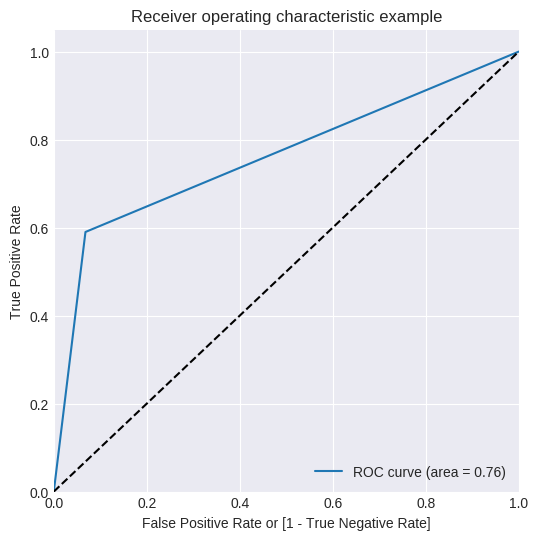

In [145]:
default_decision_tree = DecisionTreeClassifier(random_state = 100)

default_decision_tree.fit(X_train, y_train)

y_pred_decision_tree_default = default_decision_tree.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_default)

    - Default Data
    - With PCA

False Positive Rate : [0.         0.09801917 1.        ]
True Positive Rate : [0.         0.47217676 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.6870787950408642
Accuracy Score : 0.8439261633690727
Precision Score : 0.42931547619047616
Recall Score : 0.47217675941080195
F1 Score : 0.4497272018706157
Confusion Matrix : 
 [[7058  767]
 [ 645  577]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7825
           1       0.43      0.47      0.45      1222

    accuracy                           0.84      9047
   macro avg       0.67      0.69      0.68      9047
weighted avg       0.85      0.84      0.85      9047



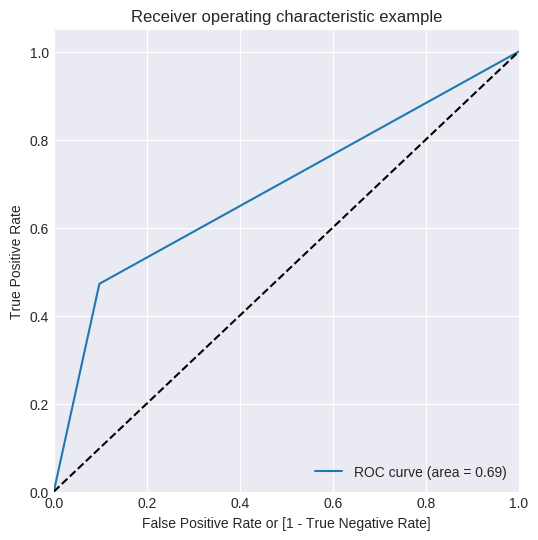

In [146]:
decision_tree_default_pca,\
X_train_decision_tree_default_pca, X_test_decision_tree_default_pca = perform_pca(X_train, X_test)

default_decision_tree_pca_model = DecisionTreeClassifier(random_state = 100)

default_decision_tree_pca_model.fit(X_train_decision_tree_default_pca, y_train)

y_pred_decision_tree_default_pca = default_decision_tree_pca_model.predict(X_test_decision_tree_default_pca)

summarize_model(y_test, y_pred_decision_tree_default_pca)

<font size=4> Decision Tree Classifier</font>
    - SMOTE Data
    - Without PCA

False Positive Rate : [0.         0.11322684 1.        ]
True Positive Rate : [0.         0.63338789 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7600805258231673
Accuracy Score : 0.8525478059025091
Precision Score : 0.46626506024096387
Recall Score : 0.6333878887070377
F1 Score : 0.5371269951422623
Confusion Matrix : 
 [[6939  886]
 [ 448  774]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      7825
           1       0.47      0.63      0.54      1222

    accuracy                           0.85      9047
   macro avg       0.70      0.76      0.72      9047
weighted avg       0.88      0.85      0.86      9047



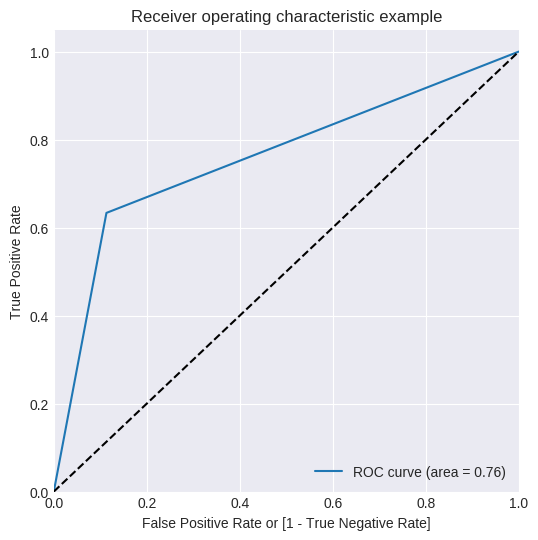

In [147]:
decision_tree_smote_default_model = DecisionTreeClassifier(random_state = 100)

decision_tree_smote_default_model.fit(X_train_smote, y_train_smote)

y_pred_decision_tree_smote_default = decision_tree_smote_default_model.predict(X_test)

summarize_model(y_test, y_pred_decision_tree_smote_default)

    - SMOTE Data
    - With PCA

False Positive Rate : [0.         0.17341853 1.        ]
True Positive Rate : [0.         0.58183306 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.7042072651025135
Accuracy Score : 0.7935227147120593
Precision Score : 0.34381044487427465
Recall Score : 0.5818330605564648
F1 Score : 0.43221884498480234
Confusion Matrix : 
 [[6468 1357]
 [ 511  711]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.83      0.87      7825
           1       0.34      0.58      0.43      1222

    accuracy                           0.79      9047
   macro avg       0.64      0.70      0.65      9047
weighted avg       0.85      0.79      0.81      9047



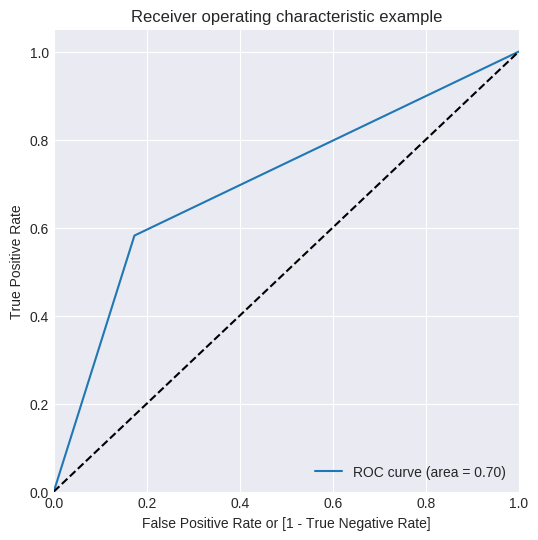

In [148]:
decision_tree_smote_default_pca,\
X_train_decision_tree_smote_default_pca,\
X_test_decision_tree_smote_default_pca = perform_pca(X_train_smote, X_test)

decision_tree_smote_default_pca_model = DecisionTreeClassifier(random_state = 100)

decision_tree_smote_default_pca_model.fit(X_train_decision_tree_smote_default_pca, y_train_smote)

y_pred_decision_tree_smote_default_pca = decision_tree_smote_default_pca_model.predict(X_test_decision_tree_smote_default_pca)

summarize_model(y_test, y_pred_decision_tree_smote_default_pca)

<font size=4> Insights:</font>

    - Training Data with Smote class imbalance technique without PCA seems to be providing best overall performance for churn class prediction. Hence, using the same to hypertune parameters

<font size=4>Initialize parameters and set pipeline</font>

In [149]:
decision_tree_max_depth = range(2, 11, 1)
decision_tree_min_samples_leaf = range(1, 251, 50)

decision_tree_parameters = {'decision_tree__min_samples_leaf': decision_tree_min_samples_leaf,
                            'decision_tree__max_depth': decision_tree_max_depth}

decision_tree = DecisionTreeClassifier(random_state = 100)

decision_tree_pipeline = Pipeline(steps=[('decision_tree', decision_tree)])

<font size=4> Hyperparameters Tuning</font>

In [150]:
decision_tree_grid_search = create_grid_search(decision_tree_pipeline, decision_tree_parameters)
decision_tree_cv_results = conduct_grid_search(decision_tree_grid_search, X_train_smote, y_train_smote)

{'decision_tree__max_depth': range(2, 11),
 'decision_tree__min_samples_leaf': range(1, 251, 50)}

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.9min finished


Best roc_auc score after hyperparameters tuning : 0.9497111645463061
Best parameters after hyperparameters tuning for roc_auc score : {'decision_tree__max_depth': 10, 'decision_tree__min_samples_leaf': 51}


<font size=4> Validating Hyperparameters Tuning results </font>

In [151]:
def plot_params(dataframe, param, sub_param, param_name, sub_param_name):
    subplots_values = dataframe[param].unique()
    total_subplot_values = len(subplots_values)
    subplot_rows = math.ceil(total_subplot_values /2)
    fig = plt.figure(figsize = (25, subplot_rows * 6))
    for index, param_value in enumerate(subplots_values):
        param_ax1 = fig.add_subplot(subplot_rows, 2, (index + 1))
        plot_hyperparameters_subplot(dataframe[dataframe[param] == param_value], sub_param, 
                   param_ax1, sub_param_name, '{} = {}'.format(param_name, param_value))
    plt.show()

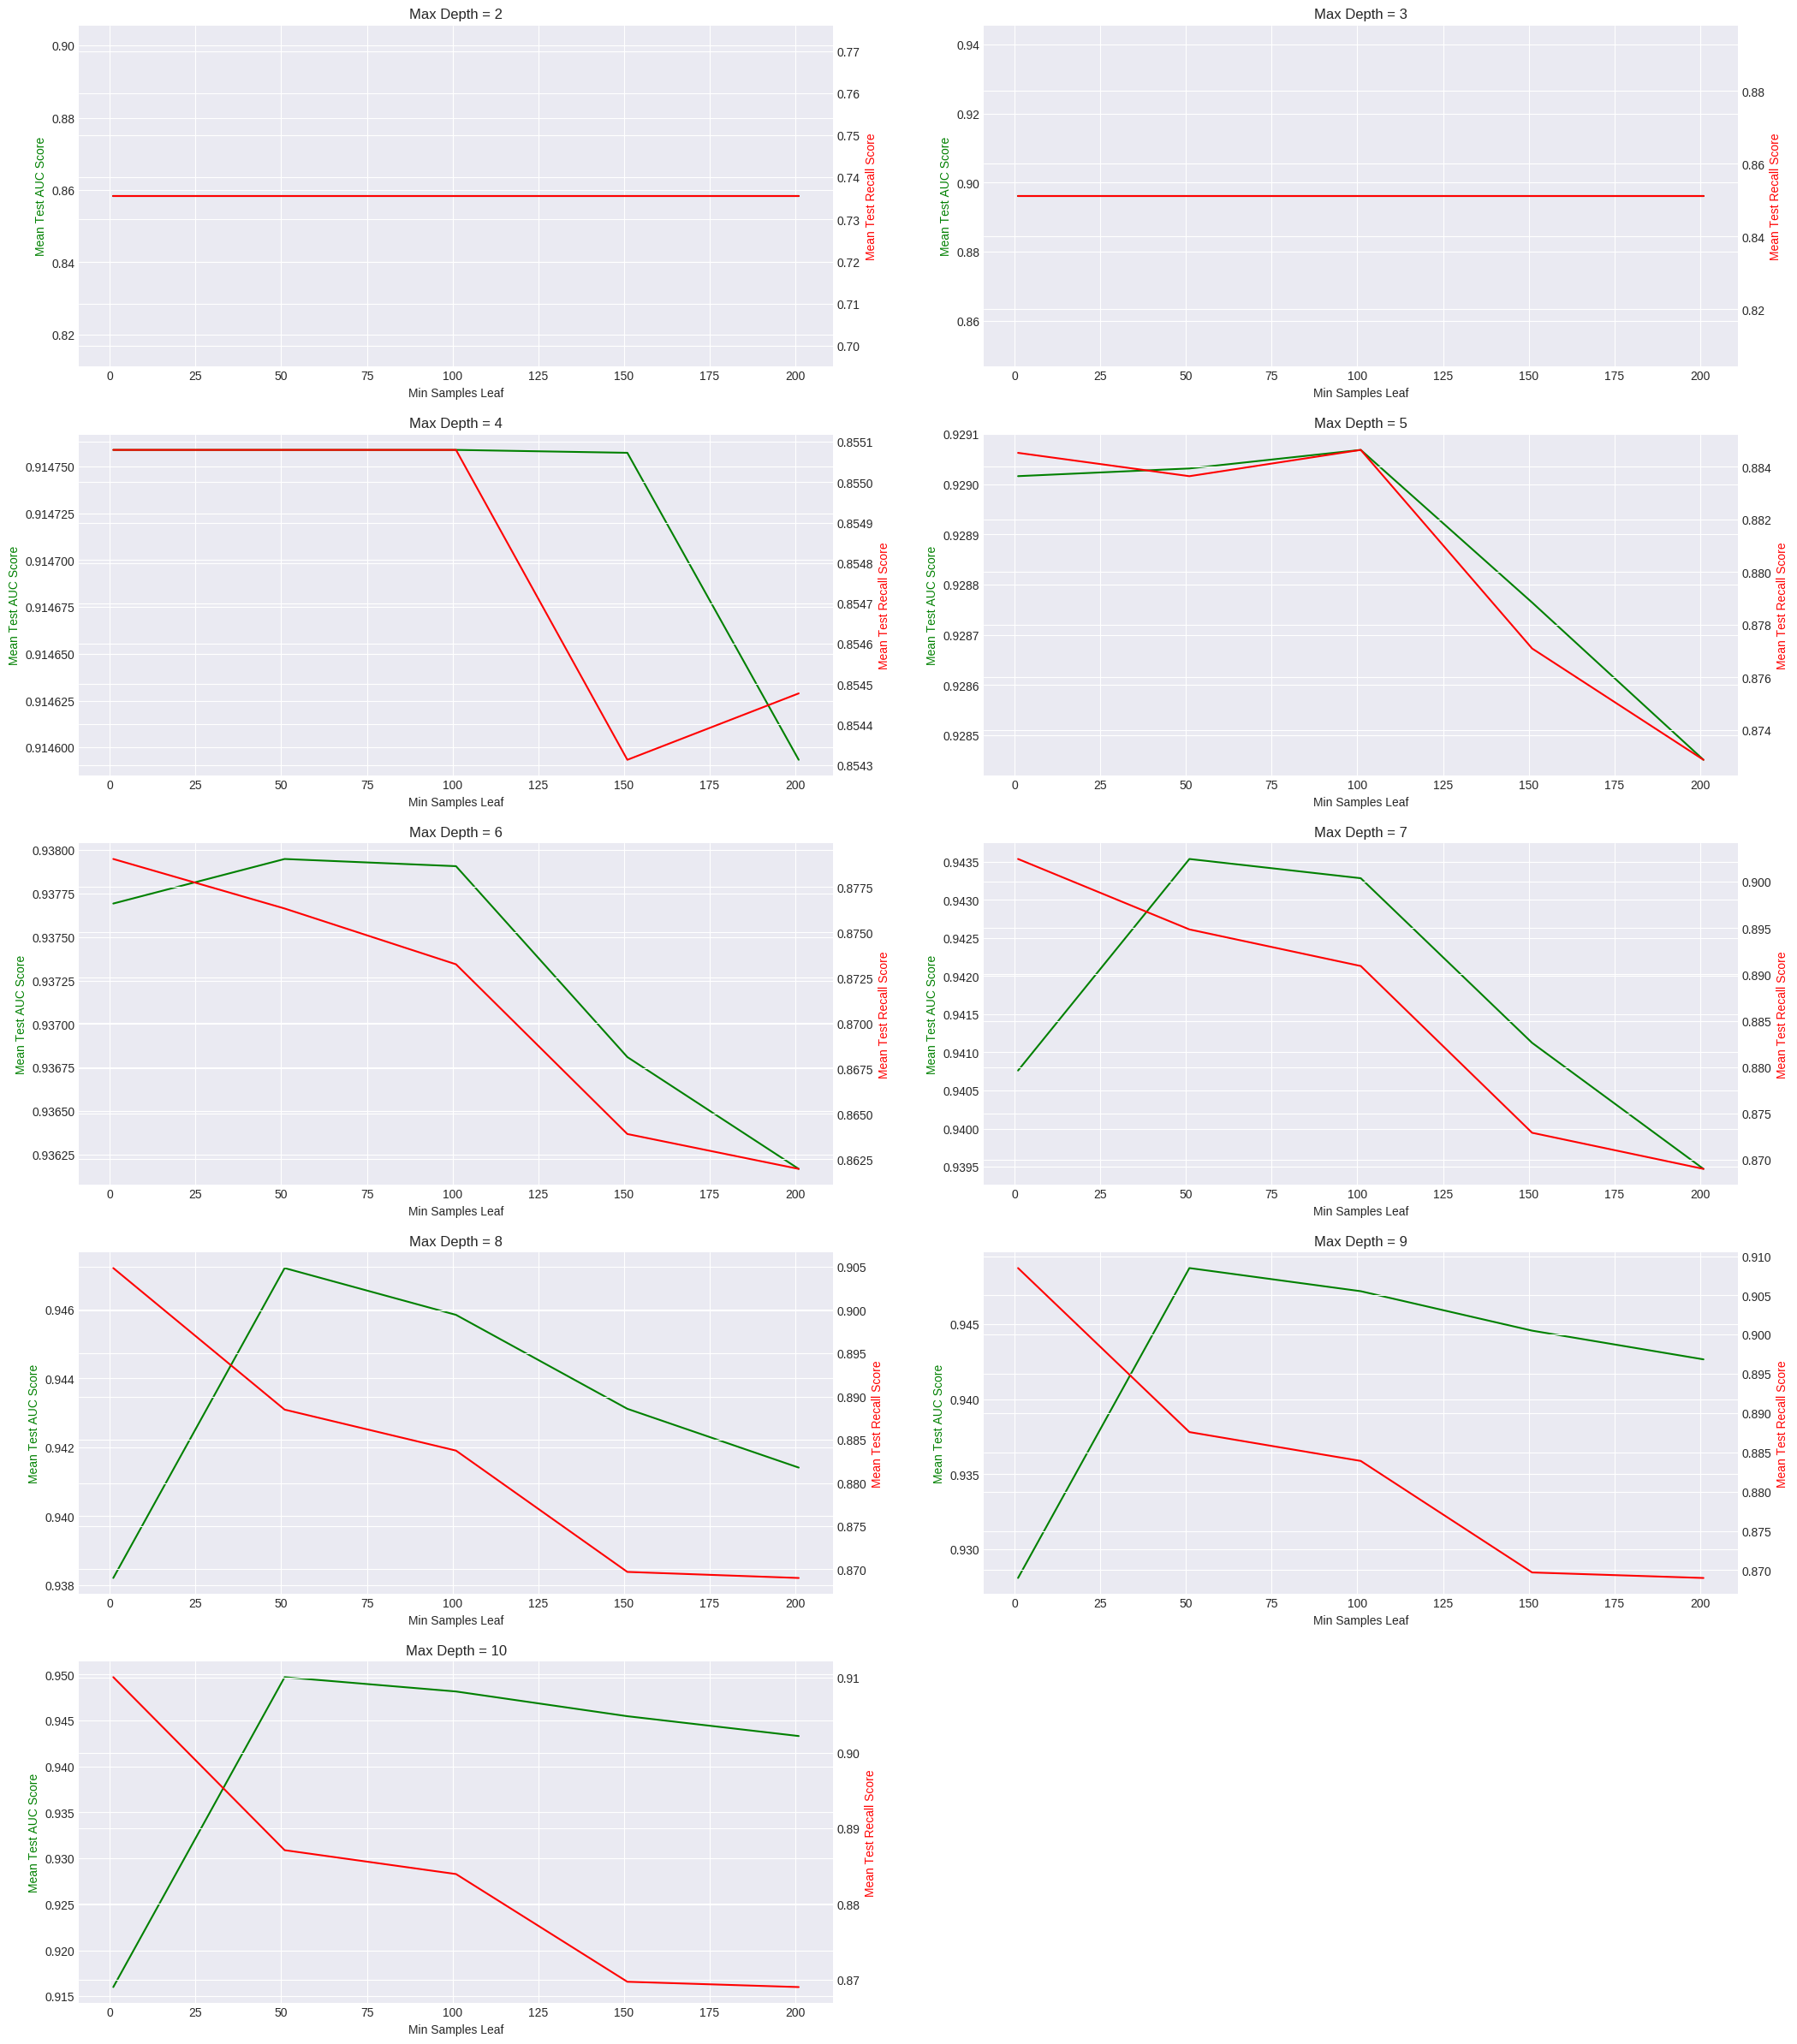

In [153]:
import math
plot_params(decision_tree_cv_results, 'param_decision_tree__max_depth',
                    'param_decision_tree__min_samples_leaf','Max Depth','Min Samples Leaf')

<font size='4'> Final Decision Tree Classifier Model </font>

False Positive Rate : [0.         0.11092652 1.        ]
True Positive Rate : [0.         0.77741408 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.8332437788572653
Accuracy Score : 0.8739913783574665
Precision Score : 0.5225522552255225
Recall Score : 0.7774140752864157
F1 Score : 0.625
Confusion Matrix : 
 [[6957  868]
 [ 272  950]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      7825
           1       0.52      0.78      0.62      1222

    accuracy                           0.87      9047
   macro avg       0.74      0.83      0.77      9047
weighted avg       0.90      0.87      0.88      9047



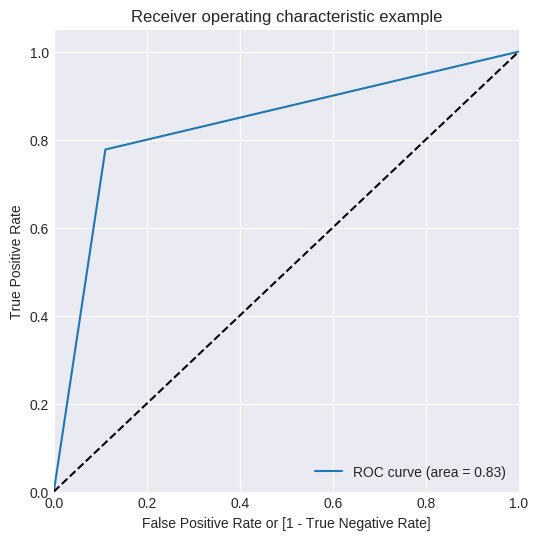

In [154]:
final_decision_tree = DecisionTreeClassifier(random_state = 100, min_samples_leaf = 50, max_depth = 6)
final_decision_tree.fit(X_train_smote, y_train_smote)

y_pred_decision_tree = final_decision_tree.predict(X_test)
summarize_model(y_test, y_pred_decision_tree)

<font size=4> Plot Final Decision Tree </font>

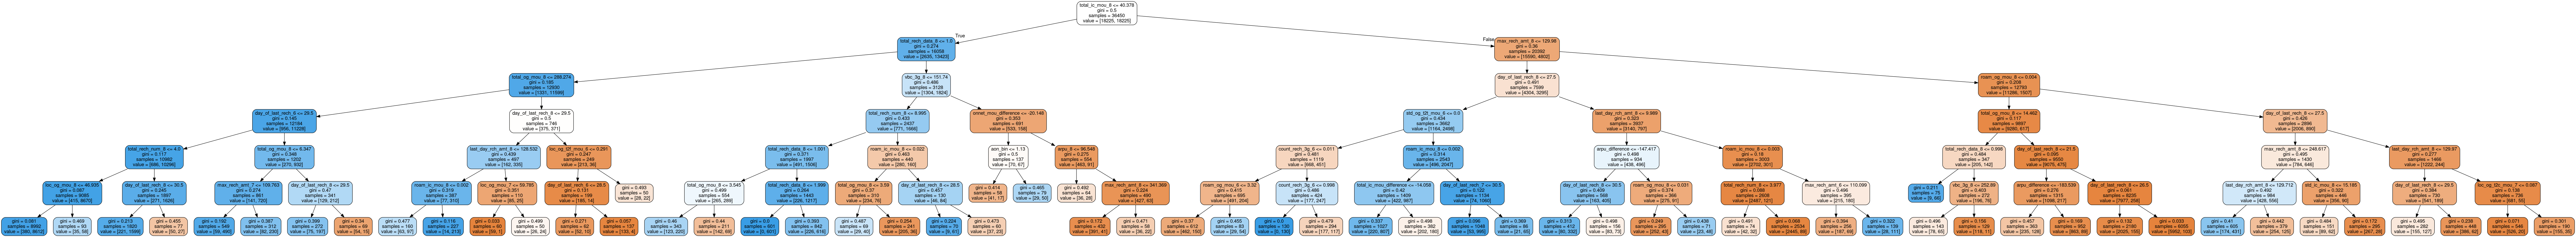

In [163]:
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image

# Plot Decision tree with best params after hyperparameter tuning
dot_data = StringIO()  
export_graphviz(final_decision_tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest Classifier

Since Random Forest is an ensemble of Decision Trees. Therefore, using smote imbalance technique without PCA data set to train model.

### Default Random Forest Classifier Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


False Positive Rate : [0.         0.06734824 1.        ]
True Positive Rate : [0.         0.72176759 1.        ]
Thresholds : [2 1 0]
ROC AUC Score : 0.827209675648259
Accuracy Score : 0.9041671272244943
Precision Score : 0.6259758694109298
Recall Score : 0.7217675941080196
F1 Score : 0.6704675028506272
Confusion Matrix : 
 [[7298  527]
 [ 340  882]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      7825
           1       0.63      0.72      0.67      1222

    accuracy                           0.90      9047
   macro avg       0.79      0.83      0.81      9047
weighted avg       0.91      0.90      0.91      9047



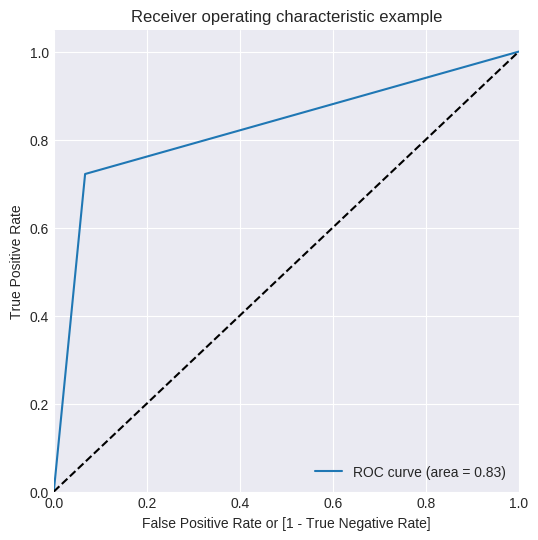

Out of Bag Error : 0.9412345679012346


In [164]:
random_forest_default_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1)
random_forest_default_model.fit(X_train_smote, y_train_smote)

y_pred_random_forest_default = random_forest_default_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_default)
print('Out of Bag Error : {}'.format(random_forest_default_model.oob_score_))

<font size=4> Initialize parameters and set pipeline</font>


In [165]:
random_forest_max_features = range(12, 71, 4)
random_forest_n_estimators = range(100, 1001, 100)

random_forest_parameters = {'random_forest__max_features': random_forest_max_features, 
                           'random_forest__n_estimators': random_forest_n_estimators}

random_forest = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, n_jobs= -1)

random_forest_pipeline = Pipeline(steps=[('random_forest', random_forest)])

<font size=4> Hyperparameters Tuning </font>

In [166]:
random_forest_grid_search = create_grid_search(random_forest_pipeline, random_forest_parameters, cv_fold_split = 2)
random_forest_cv_results = conduct_grid_search(random_forest_grid_search, X_train_smote, y_train_smote)

{'random_forest__max_features': range(12, 71, 4),
 'random_forest__n_estimators': range(100, 1001, 100)}

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 18.5min


KeyboardInterrupt: 

<font size=4> Validate Hyperparameters tuning results</font>

In [ ]:
plot_params(random_forest_cv_results, 'param_random_forest__n_estimators', 'param_random_forest__max_features', 
            'Number of Estimators', 'Max Features')

<font size=4>Final Random Forest Classifier Model</font>

In [ ]:
random_forest_final_model = RandomForestClassifier(random_state = 100, oob_score = True, warm_start = True, 
                                                     verbose = 1, n_jobs= -1, max_features = 44, n_estimators = 400)
random_forest_final_model.fit(X_train_smote, y_train_smote)

y_pred_random_forest_final = random_forest_final_model.predict(X_test)
summarize_model(y_test, y_pred_random_forest_final)

### Balanced Random Forest Classifier</font>

    
    - Since Balanced Random Forest uses a sampling strategy to handle class imbalance with underlying Random Forest implementation. Therefore, using default without PCA data set to train model.

<font size=4>Default Balanced Random Forest Classifier Model</font>

In [ ]:
balanced_random_forest_default_model = BalancedRandomForestClassifier(random_state = 100, 
                                                                      oob_score = True, n_jobs = -1,
                                                                      warm_start=True, verbose = 1,
                                                                     replacement = True,
                                                                     class_weight = 'balanced_subsample')
balanced_random_forest_default_model.fit(X_train, y_train)

y_pred_balanced_random_forest_default = balanced_random_forest_default_model.predict(X_test)
analyse_model(y_test, y_pred_balanced_random_forest_default)

<font size=4> Initialize parameters and set pipeline</font>

In [ ]:
balanced_random_forest_n_estimators = range(100, 2001, 200)

balanced_random_forest_parameters = {'balanced_random_forest__n_estimators': balanced_random_forest_n_estimators}

balanced_random_forest = BalancedRandomForestClassifier(random_state = 100, 
                                                                      oob_score = True, n_jobs = -1,
                                                                      warm_start=True,
                                                                     replacement = True,
                                                                     class_weight = 'balanced_subsample')

balanced_random_forest_pipeline = Pipeline(steps=[('balanced_random_forest', balanced_random_forest)])

<font size=4> Hyperparameters Tuning </font>

In [ ]:
balanced_random_forest_grid_search = create_grid_search(balanced_random_forest_pipeline, 
                                                balanced_random_forest_parameters, cv_fold_split = 2)
balanced_random_forest_cv_results = conduct_grid_search(balanced_random_forest_grid_search, 
                                                        X_train, y_train)

<font size=4> Validate Hyperparameters tuning results</font>

In [ ]:
plot_param(balanced_random_forest_cv_results, 'param_balanced_random_forest__n_estimators', 'Number of Estimators')

<font size=4> Final Balanced Random Forest Classifier Model</font>

In [ ]:
balanced_random_forest_final_model = BalancedRandomForestClassifier(random_state = 100, 
                                                                    oob_score = True, n_jobs = -1,
                                                                    warm_start=True, verbose = 1,
                                                                    replacement = True,
                                                                    class_weight = 'balanced_subsample', 
                                                                    n_estimators = 300)

balanced_random_forest_final_model.fit(X_train, y_train)

y_pred_balanced_random_forest_final = balanced_random_forest_final_model.predict(X_test)
analyse_model(y_test, y_pred_balanced_random_forest_final)